# Utilizing Yelp Cost Estimates to Predict Neighborhood Affluence
**_Authors:_** *Alex Lau, Despina Matos, Julie Vovchenko, and Kelly Wu* 

## Problem Statement

According to [FEMA](https://www.fema.gov/blog/2015-04-29/everyone-must-be-prepared-emergencies), the importance of preparing ourselves for disasters is universal. Thus, when these situations occur, it is a difficult task for organizations or nations to decide where to send initial resources. Our client, [New Light Technologies](https://newlighttechnologies.com/), is interested in utilizing public and easily accessible data as a practical solution to help organizations or nations with this pressing matter. Specificically, **can Yelp cost estimates determine neighborhood affluence?** 

Given the neighborhood affluence, it is a great source for determining disaster-resistance. Therefore, scraping Yelp's data by using [Yelp's API](https://www.yelp.com/fusion) and connecting zipcodes from business locations to [United State Census](https://2020census.gov/?cid=20002:%2Bus%20%2Bcensus:sem.ga:p:dm:en:&utm_source=sem.ga&utm_medium=p&utm_campaign=dm:en&utm_content=20002&utm_term=%2Bus%20%2Bcensus) data, we can determine if Yelp's data correlates with affluence. We also decided our location for our research will be the borough of Manhattan because there were a number of natural disasters in this location and this location is extremely diverse. We will use various supervised machine learning models and we will use our models' accuracy scores as the way to determine the best model.  

## Executive Summary

We began by determing how large of a scope our Yelp data should be location wise and what supplemental data source we should include with our Yelp dataset. We decided on using Yelp's Manhattan data because we were able to satisfy the requirements for answering the problem statment. In addition, we decided on using the Census data because it was easily accessible to acquire income data with Manhattan's zipcodes. In other words, we used the Census data because it was able to influence our definition of "affluence". We determined our "affluence rate" after exploring our final dataset.  

Next, we pulled the Yelp data by using Yelp's API and collected the Census income data by filtering with Manhattan's zipcodes on the Census' website. The Yelp data was imported was in JSON format. Therefore, we need to create a dataframe in Pandas to have easier access to clean and manipulate through the data. For the Census data, it was already in a dataframe that we could manipulate through. 

Once, we looked through the two dataframes, we looked for particular features. In the Yelp data, we primarily focused on cost estimates. In the census data, we primarily focused on household income. With creating these datasets, we did data cleaning in each. We checked for duplicate posts and missing values. We also dropped data that was not related and isolated data from columns that benefited to answering our problem statement. 

Once our datasets were cleaned, we did some exploratory data analysis. We analyzed trends and correlations between median income and restaurants’ cost estimates through bar graphs and geomapping.

Next, we were able to preprocess. We merged four datasets together into one to get a master dataset. With some trial and error, we decided to do feature engineering. We create an average cost estimate for each zipcode because we wanted to determine if there was a relationship between the average and the median income. Then, we created our X feature and determined our "affluence rate" which was our target variable. We also did a train-test split. Then, we determined a baseline score to compare to our models' results.

Lastly, we were able to model. We modeled various classification models with various hyperparameters. 

In the end, we focused on accuracy score and the bias-variance tradeoff from each classification model to determine which model was the best to answer our problem statement. 

## Table of Contents
- [Libraries](#Libraries)
- [Census Data Cleaning](#Census-Data-Cleaning)
    - [Creating The Medium Income Dataset](#Creating-The-Medium-Income-Dataset)
    - [Creating The Income Breakdowns Dataset](#Creating-The-Income-Breakdowns-Dataset)
    - [Exporting The Census Datasets](#Exporting-The-Census-Datasets)
    - [Visually Exploring Income Using The Income Breakdown](#Visually-Exploring-Income-Using-The-Income-Breakdown) 
- [Yelp Data Cleaning](#Yelp-Data-Cleaning)
    - [Read in Data](#Read-in-Data)
    - [Drop Unnecessary Columns](#Drop-Unnecessary-Columns)
    - [Drop Null Values in Price Column](#Drop-Null-Values-in-Price-Column)
    - [Isolate Zip Code in Location Column](#Isolate-Zip-Code-in-Location-Column)
    - [Isolate Alias in Categories Column](#Isolate-Alias-in-Categories-Column)
    - [Merging Yelp Data With Dummies](#Merging-Yelp-Data-With-Dummies)
        - [Filtering Non Restaurants](#Filtering-Non-Restuarants)
        - [Creating The Price Dummy Columns](#Creating-The-Price-Dummy-Columns)
        - [Imputing Data](#Imputing-Data)
        - [Final Touches](#Final-Touches)
    - [Merging Yelp Data with Census Data](#Merging-Yelp-Data-with-Census-Data)
    - [Exporting Yelp Datasets](#Exporting-Yelp-Datasets)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)    
   - [Averaging The Amount of Restaurants Given Each Price Range](#Averaging-The-Amount-of-Restaurants-Given-Each-Price-Range)
        - [Visualizing High Incomes](#Visualizing-High-Incomes)
        - [Visualizing Low Incomes](#Visualizing-Low-Incomes)
   - [Exploring by Zip Code](#Exploring-by-Zip-Code)
		- [1 Dollar Cost Estimate](#1-Dollar-Cost-Estimate)
		- [2 Dollar Cost Estimate](#2-Dollar-Cost-Estimate)
		- [3 Dollar Cost Estimate](#3-Dollar-Cost-Estimate)
		- [4 Dollar Cost Estimate](#4-Dollar-Cost-Estimate)
   - [Exploring 10012, 10014, 10019, 10022 Zip Codes](#Exploring-10012,-10014,-10019,-10022-Zip-Codes)
		- [1 Dollar Cost Estimate Highlights](#1-Dollar-Cost-Estimate-Highlights)
		- [2 Dollar Cost Estimate Highlights](#2-Dollar-Cost-Estimate-Highlights)
		- [3 Dollar Cost Estimate Highlights](#3-Dollar-Cost-Estimate-Highlights)
		- [4 Dollar Cost Estimate Highlights](#4-Dollar-Cost-Estimate-Highlights)
		- [Supplement Visualizes](#Supplement-Visualizes)
   - [Setting Up For GeoMaps](#Setting-Up-For-GeoMaps)
		- [Mapping by Income](#Mapping-by-Income)
		- [Mapping by 1 Dollar Cost Estimate](#Mapping-by-1-Dollar-Cost-Estimate)
		- [Mapping by 2 Dollar Cost Estimate](#Mapping-by-2-Dollar-Cost-Estimate)
		- [Mapping by 3 Dollar Cost Estimate](#Mapping-by-3-Dollar-Cost-Estimate)
		- [Mapping by 4 Dollar Cost Estimate](#Mapping-by-4-Dollar-Cost-Estimate)
- [Preprocessing](#Preprocessing)
    - [Feature Engineering](#Feature-Engineering)
    - [Classifying Affluence](#Classifying-Affluence)
    - [Train Test Split](#Train-Test-Split)
    - [Baseline Score](#Baseline-Score)
- [Modeling](#Modeling)
    - [Decision Tree Classifier with Default Hyperparameters](#Decision-Tree-Classifier-with-Default-Hyperparameters)
    - [GridSearch on Decision Tree Classifier](#GridSearch-on-Decision-Tree-Classifier)
    - [Random Forest Classifier](#Random-Forest-Classifier)
    - [AdaBoost Classifier](#AdaBoost-Classifier)
    - [Gradient Boost Classifier](#Gradient-Boost-Classifier)
    - [Voting Classifier](#Voting-Classifier)
    - [Comparing Predicted Versus Actual](#Comparing-Predicted-Versus-Actual)
        - [Export Affluence Classifications](#Export-Affluence-Classifications)
- [Mapping The Affluence](#Mapping-The-Affluence)
- [Conclusion](#Conclusion)
- [Limitations](#Limitations)
- [Further Explorations](#Further-Explorations)
    - [Read in Data for Cuisine](#Read-in-Data-for-Cuisine)
    - [Data Cleaning in Cuisine](#Data-Cleaning-in-Cuisine)
    - [Preprocessing for The Cuisine Data](#Preprocessing-for-The-Cuisine-Data)
    - [Modeling The Cuisine Data](#Modeling-The-Cuisine-Data)
- [Recommendations](#Recommendations)
- [Sources](#Sources)

## Libraries

In [1]:
# Note for user: if you do not have these libraries, install these beforehand
# pip install geopandas
# conda install descartes

# creating datasets
import pandas as pd 

# EDA
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from shapely.geometry import Point, Polygon
from descartes.patch import PolygonPatch
# make_axes_locatable is for seperating plot and legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

# modeling
import ast
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

We have all our libraries, so we will begin loading in our US Census data.

## Census Data Cleaning

Using the [median income in the past 12 months (in 2018 inflation-adjusted dollars)](https://data.census.gov/cedsci/table?q=income&tid=ACSST1Y2018.S1903&t=Income%20%28Households,%20Families,%20Individuals%29&vintage=2018) data from the [United States Census Website](https://www.census.gov/), we were able to obtain the supplement data that we additionally need to answer our problem statement. With this data, we can create a medium income dataset and an income breakdown dataset for future use. In other words, we will be able to use these two datasets to determine the affluence in each livable neighborhood in Manhattan.

In [2]:
# reading in the data from census
census = pd.read_csv('../data/ACSST5Y2018.S1901_data_with_overlays_2020-02-11T175453.csv')

In [3]:
# check to see if it was loaded in
census.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C02_001E,S1901_C02_001M,S1901_C03_001E,S1901_C03_001M,S1901_C04_001E,S1901_C04_001M,...,S1901_C04_015E,S1901_C04_015M,S1901_C01_016E,S1901_C01_016M,S1901_C02_016E,S1901_C02_016M,S1901_C03_016E,S1901_C03_016M,S1901_C04_016E,S1901_C04_016M
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...,Estimate!!Households!!PERCENT ALLOCATED!!Nonfa...,Margin of Error!!Households MOE!!PERCENT ALLOC...,Estimate!!Families!!PERCENT ALLOCATED!!Nonfami...,Margin of Error!!Families MOE!!PERCENT ALLOCAT...,Estimate!!Married-couple families!!PERCENT ALL...,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...
1,8600000US10001,ZCTA5 10001,12431,521,3838,413,2831,373,8593,513,...,(X),(X),(X),(X),(X),(X),(X),(X),19.1,(X)
2,8600000US10002,ZCTA5 10002,33540,614,16565,738,9655,634,16975,819,...,(X),(X),(X),(X),(X),(X),(X),(X),24.3,(X)
3,8600000US10003,ZCTA5 10003,26124,703,7946,551,6905,640,18178,836,...,(X),(X),(X),(X),(X),(X),(X),(X),25.8,(X)
4,8600000US10004,ZCTA5 10004,1659,238,709,183,641,175,950,190,...,(X),(X),(X),(X),(X),(X),(X),(X),19.2,(X)


The data was successfully loaded in. However, we will want row 0 as the column names in the dataframe.

In [4]:
# lets get row 0
columns_names = census.iloc[0,: ]

In [5]:
# checking to see if it worked
columns_names

GEO_ID                                                           id
NAME                                           Geographic Area Name
S1901_C01_001E                          Estimate!!Households!!Total
S1901_C01_001M               Margin of Error!!Households MOE!!Total
S1901_C02_001E                            Estimate!!Families!!Total
                                        ...                        
S1901_C02_016M    Margin of Error!!Families MOE!!PERCENT ALLOCAT...
S1901_C03_016E    Estimate!!Married-couple families!!PERCENT ALL...
S1901_C03_016M    Margin of Error!!Married-couple families MOE!!...
S1901_C04_016E    Estimate!!Nonfamily households!!PERCENT ALLOCA...
S1901_C04_016M    Margin of Error!!Nonfamily households MOE!!PER...
Name: 0, Length: 130, dtype: object

In [6]:
# now renamed the columns
census.columns = columns_names

In [7]:
# lets check to see if it worked
census.head(2)

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!Total,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...,Estimate!!Households!!PERCENT ALLOCATED!!Nonfa...,Margin of Error!!Households MOE!!PERCENT ALLOC...,Estimate!!Families!!PERCENT ALLOCATED!!Nonfami...,Margin of Error!!Families MOE!!PERCENT ALLOCAT...,Estimate!!Married-couple families!!PERCENT ALL...,Margin of Error!!Married-couple families MOE!!...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households MOE!!PER...
1,8600000US10001,ZCTA5 10001,12431,521,3838,413,2831,373,8593,513,...,(X),(X),(X),(X),(X),(X),(X),(X),19.1,(X)


Also, lets drop row 0 because we do not need it anymore in our dataframe.

In [8]:
# dropping the row 0 in our dataframe
census = census.drop([0])

In [9]:
# lets check to see if it worked 
census.head(2)

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!Total,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
1,8600000US10001,ZCTA5 10001,12431,521,3838,413,2831,373,8593,513,...,(X),(X),(X),(X),(X),(X),(X),(X),19.1,(X)
2,8600000US10002,ZCTA5 10002,33540,614,16565,738,9655,634,16975,819,...,(X),(X),(X),(X),(X),(X),(X),(X),24.3,(X)


We successfully dropped row 0 in our dataframe, we can now get information in our dataframe to create the two datasets.

Lets start with creating the medium income dataset.

## Creating The Medium Income Dataset

We need a dataset that has the medium household income for each zip code in Manhattan. We want this because we will add this dataset together with the Yelp dataset to answer our problem statement. 

First, lets pick the columns in the dataframe from above to use to create our new dataset. 

In [10]:
# checking our dataframe
census.head(2)

,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households MOE!!Total,Estimate!!Families!!Total,Margin of Error!!Families MOE!!Total,Estimate!!Married-couple families!!Total,Margin of Error!!Married-couple families MOE!!Total,Estimate!!Nonfamily households!!Total,Margin of Error!!Nonfamily households MOE!!Total,...,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Married-couple families MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households MOE!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
1,8600000US10001,ZCTA5 10001,12431,521,3838,413,2831,373,8593,513,...,(X),(X),(X),(X),(X),(X),(X),(X),19.1,(X)
2,8600000US10002,ZCTA5 10002,33540,614,16565,738,9655,634,16975,819,...,(X),(X),(X),(X),(X),(X),(X),(X),24.3,(X)


We decided to use the `id` and `Estimate!!Households!!Median income (dollars)` columns from the dataframe. 

In [11]:
# finding our columns in the census dataset
census[["id", "Estimate!!Households!!Median income (dollars)"]].head(2)

,id,Estimate!!Households!!Median income (dollars)
1,8600000US10001,88526
2,8600000US10002,35859


Next, lets rename these columns to have clear and concise labels.

In [12]:
# renaming our columns
census = census.rename(columns= {"id": "zip_code", 
                                 "Estimate!!Households!!Median income (dollars)": "median_income"})

In [13]:
# lets see if it worked 
census[["zip_code", "median_income"]].head(2)

,zip_code,median_income
1,8600000US10001,88526
2,8600000US10002,35859


We successfully changed the columns names. Now, using these columns we can create a new dataset.

In [14]:
# gathering our two columns
new_cols = census[["zip_code", "median_income"]]

In [15]:
# creating our census income dataset
census_income = pd.DataFrame(data = new_cols)

In [16]:
# check to see if it worked
census_income.head(2) 

,zip_code,median_income
1,8600000US10001,88526
2,8600000US10002,35859


Next, lets check if our datatypes are correct in the new dataset. 

In [17]:
# checking for datatypes
census_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 2 columns):
zip_code         42 non-null object
median_income    42 non-null object
dtypes: object(2)
memory usage: 1008.0+ bytes


Unfortunately, our datatypes are not in the correct datatypes. So we need to change them. Lets start with our `median_income` column.

In [18]:
# checking our median_income column
census_income['median_income']

1      88526
2      35859
3     112131
4     157645
5     173333
6     176250
7     246813
8      61548
9     117923
10    128613
11    109037
12    105442
13    126601
14    117004
15    127506
16    108914
17     98833
18         -
19    118289
20    135363
21    130452
22    131668
23     85930
24     58884
25     46113
26    125140
27     34016
28     37232
29     49891
30     50391
31     58614
32     54716
33     30081
34     91936
35     45041
36     86058
37     39653
38     47137
39    100441
40    127375
41    137146
42    169844
Name: median_income, dtype: object

We observed that one of the rows in our dataset has '-', so we will need to fix this before we can change the datatype. We make it as a NaN value. 

In [19]:
# creating our NaN value for row 18
census_income.loc[18,"median_income"] = None

In [20]:
# lets check to see if it worked 
census_income.loc[18, :]

0
zip_code         8600000US10020
median_income              None
Name: 18, dtype: object

We successfully changed the value. Thus, we can change the datatype.

In [21]:
# Changing the datatype of the column
census_income['median_income'] = pd.to_numeric(census_income['median_income'])

In [22]:
# check to see if it worked
census_income['median_income'].dtype

dtype('float64')

Next, we can change our `zip_code` column as the correct datatype, yet, we will need to change the values in this column to correctly state the zipcode.

In [23]:
# create a for loop to show only the zipcode in each row
data = []
for _ in census_income['zip_code']:
    correct_values = _.replace('8600000US','') 
    data.append(correct_values)

In [24]:
# check to see if the for loop worked
data[:2]

['10001', '10002']

We successfully correctly changed the `zip_code` rows. Lets implement this data from the loop back into our census_income dataset.

In [25]:
# putting the correct zipcode data
census_income['zip_code'] = data

In [26]:
# check to see if it worked
census_income.head()

,zip_code,median_income
1,10001,88526.0
2,10002,35859.0
3,10003,112131.0
4,10004,157645.0
5,10005,173333.0


In [27]:
# Changing the datatype of the column
census_income['zip_code'] = pd.to_numeric(census_income['zip_code'])

In [28]:
# check to see if it worked
census_income['zip_code'].dtype

dtype('int64')

In sum, we were able to create our census_income dataset that has `zip_code` and `median_income` columns. We will be saving this dataset later in this notebook for future use. 

Next, lets now create our other dataset. Again, we want to create income breakdowns dataset.

## Creating The Income Breakdowns Dataset

We need a dataset that has a breakdown of ranges in household income. We will use this dataset to give us further insights in our analysis.  

First, lets pick the columns in the dataframe to use to create our new dataset.

In [29]:
# getting the columns that we need 
cols = census[["zip_code",
   "Estimate!!Households!!Total!!Less than $10,000",
   "Estimate!!Households!!Total!!$10,000 to $14,999", 
   "Estimate!!Households!!Total!!$15,000 to $24,999", 
   "Estimate!!Households!!Total!!$25,000 to $34,999",
   "Estimate!!Households!!Total!!$35,000 to $49,999", 
   "Estimate!!Households!!Total!!$50,000 to $74,999", 
   "Estimate!!Households!!Total!!$75,000 to $99,999",
   "Estimate!!Households!!Total!!$100,000 to $149,999", 
   "Estimate!!Households!!Total!!$150,000 to $199,999",
   "Estimate!!Households!!Total!!$200,000 or more"]]

Next, lets use these columns to create a new dataset.

In [30]:
# Creating our new dataframe
census_breakdown = pd.DataFrame(cols)

In [31]:
# Check to see if it worked 
census_breakdown.head(2)

,zip_code,"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more"
1,8600000US10001,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,7.6,22.5
2,8600000US10002,14.8,12.5,13.6,8.3,10.1,12.0,8.1,9.4,4.3,6.8


Next, lets rename our columns to something clear and consistent.

In [32]:
# renaming the columns
census_breakdown = census_breakdown.rename(
    columns= {"Estimate!!Households!!Total!!Less than $10,000": "households_less_than_$10,000", 
              "Estimate!!Households!!Total!!Less than $10,000": "less_than_$10,000", 
              "Estimate!!Households!!Total!!$10,000 to $14,999": "10,000_to_14,999", 
              "Estimate!!Households!!Total!!$15,000 to $24,999": "15,000_to_24,999", 
              "Estimate!!Households!!Total!!$25,000 to $34,999": "25,000_to_34,999", 
              "Estimate!!Households!!Total!!$35,000 to $49,999": "35,000_to_$49,999", 
              "Estimate!!Households!!Total!!$50,000 to $74,999": "50,000_to_74,999", 
              "Estimate!!Households!!Total!!$75,000 to $99,999": "75,000_to_99,999", 
              "Estimate!!Households!!Total!!$100,000 to $149,999": "100,000_to_149,999",
              "Estimate!!Households!!Total!!$150,000 to $199,999": "150,000_to_199,999",
              "Estimate!!Households!!Total!!$200,000 or more": "more_than_or_200,000"         
             })

In [33]:
# lets check to see if it worked 
census_breakdown.columns

Index(['zip_code', 'less_than_$10,000', '10,000_to_14,999', '15,000_to_24,999',
       '25,000_to_34,999', '35,000_to_$49,999', '50,000_to_74,999',
       '75,000_to_99,999', '100,000_to_149,999', '150,000_to_199,999',
       'more_than_or_200,000'],
      dtype='object', name=0)

We successfully changed the columns names. Next, lets check if our datatypes are correct in the new dataset.

In [34]:
# checking for datatypes
census_breakdown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 11 columns):
zip_code                42 non-null object
less_than_$10,000       42 non-null object
10,000_to_14,999        42 non-null object
15,000_to_24,999        42 non-null object
25,000_to_34,999        42 non-null object
35,000_to_$49,999       42 non-null object
50,000_to_74,999        42 non-null object
75,000_to_99,999        42 non-null object
100,000_to_149,999      42 non-null object
150,000_to_199,999      42 non-null object
more_than_or_200,000    42 non-null object
dtypes: object(11)
memory usage: 3.9+ KB


Unfortunately, our datatypes are not in the correct datatypes. So lets look at the `less_than_$10,000` column and change its datatype.

In [35]:
# checking less_than_$10,000 
census_breakdown[['zip_code', 'less_than_$10,000']]

,zip_code,"less_than_$10,000"
1,8600000US10001,8.8
2,8600000US10002,14.8
3,8600000US10003,4.7
4,8600000US10004,2.9
5,8600000US10005,7.0
6,8600000US10006,4.1
7,8600000US10007,1.6
8,8600000US10009,12.5
9,8600000US10010,3.7
10,8600000US10011,6.1


We observed that one of the rows in our dataset has '-', so we will need to fix this before we can change the datatype. We make it as a NaN value.

In [36]:
# creating our NaN value for row 18
census_breakdown.loc[18, 
      ['less_than_$10,000', '10,000_to_14,999', '15,000_to_24,999',
       '25,000_to_34,999', '35,000_to_$49,999', '50,000_to_74,999',
       '75,000_to_99,999', '100,000_to_149,999', '150,000_to_199,999',
       'more_than_or_200,000']] = None

In [37]:
# lets check to see if it worked 
census_breakdown.loc[18, :]

0
zip_code                8600000US10020
less_than_$10,000                 None
10,000_to_14,999                  None
15,000_to_24,999                  None
25,000_to_34,999                  None
35,000_to_$49,999                 None
50,000_to_74,999                  None
75,000_to_99,999                  None
100,000_to_149,999                None
150,000_to_199,999                None
more_than_or_200,000              None
Name: 18, dtype: object

We successfully changed the value. Next, we can change our `zip_code` column to correctly state the zipcode.

In [38]:
# create a for loop to show only the zipcode in each row
data = []
for _ in census_breakdown['zip_code']:
    correct_values = _.replace('8600000US','') 
    data.append(correct_values)

In [39]:
#check to see if the for loop worked
data[:2]

['10001', '10002']

We successfully correctly changed the `zip_code` rows. Lets implement this data from the loop back into our census_breakdown dataset.

In [40]:
# putting the correct zipcode data
census_breakdown['zip_code'] = data

In [41]:
# check to see if it worked
census_breakdown.head(2)

,zip_code,"less_than_$10,000","10,000_to_14,999","15,000_to_24,999","25,000_to_34,999","35,000_to_$49,999","50,000_to_74,999","75,000_to_99,999","100,000_to_149,999","150,000_to_199,999","more_than_or_200,000"
1,10001,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,7.6,22.5
2,10002,14.8,12.5,13.6,8.3,10.1,12.0,8.1,9.4,4.3,6.8


We can now change all of our datatypes.

In [42]:
# changing the columns datatypes
census_breakdown = census_breakdown.apply(pd.to_numeric)

In [43]:
# lets check if it worked
census_breakdown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 11 columns):
zip_code                42 non-null int64
less_than_$10,000       41 non-null float64
10,000_to_14,999        41 non-null float64
15,000_to_24,999        41 non-null float64
25,000_to_34,999        41 non-null float64
35,000_to_$49,999       41 non-null float64
50,000_to_74,999        41 non-null float64
75,000_to_99,999        41 non-null float64
100,000_to_149,999      41 non-null float64
150,000_to_199,999      41 non-null float64
more_than_or_200,000    41 non-null float64
dtypes: float64(10), int64(1)
memory usage: 5.2 KB


In sum, we were able to create our census_breakdown dataset that has `zip_code`, `less_than_$10,000`, `10,000_to_14,999`, `15,000_to_24,999`, `25,000_to_34,999`, `35,000_to_$49,999`, `50,000_to_74,999`, `75,000_to_99,999`, `100,000_to_149,999`, `150,000_to_199,999`, and `more_than_or_200,000` columns. We will be saving this dataset for future use.

Lets save both datasets now.

## Exporting The Census Datasets 

Saving the census_income dataset.

In [44]:
# Here is what we will like to save it as
# index = false for no index column
census_income.to_csv('../data/census_income.csv', index = False)

Saving the census_breakdown dataset.

In [45]:
# Here is what we will like to save it as
# index = false for no index column
census_breakdown.to_csv('../data/census_breakdown.csv', index = False)

We can now visually explore the incomes in Manhattan by using the income breakdown dataset.

## Visually Exploring Income Using The Income Breakdown

When we explore incomes, we are looking for relationships and trends. We will create a function for our bar graphs.

In [46]:
# Reading Census Breakdown by zipcode
df = pd.read_csv('../data/census_breakdown.csv')

In [47]:
# Function that Plots Income by Income groups and % of people in that group by zipcode
def plot_income_by_zip(df, zipcode):
    long_df = pd.melt(df[df['zip_code'] == zipcode])
    # long_df.sort_values('value', ascending = False)
    long_df=long_df.drop(long_df.index[0])

    # seting the grid to whitegrid
    sns.set_style("whitegrid")

    # long_df = pd.melt(df)
    sns.barplot(y = long_df.variable, 
                x = long_df.value,
               palette="GnBu")

    # Setting the title to size 25
    plt.title (f'Income by Zip {zipcode}', 
               size=25);
    plt.ylabel('Income Groups');
    plt.xlabel('Amount of People (%)', size = 10);
    # setting size of yticks and xticks to 12
    plt.yticks(size = 12);
    plt.xticks(size = 12);

We decided to chose two zipcodes. One zipcode from lower Manhattan and one from upper Manhattan.

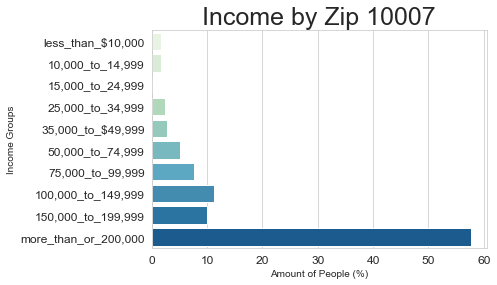

In [48]:
# lower manhattan
plot_income_by_zip(df, 10007)

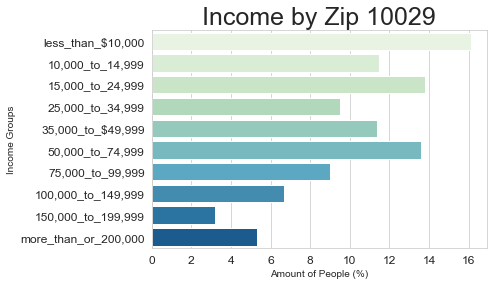

In [49]:
# upper manhattan
plot_income_by_zip(df, 10029)

**Insights:**  
In zip code 1007: individuals are more likely to have higher income 


In zip code 10029: indviduals are more likely to have lesser income, however, there are still oscillations

In sum, we were able to clean and explore the census data, lets now clean the yelp data. 

# Yelp Data Cleaning

We are going to cleaning the scraped Yelp data. We are alternating this dataframe to answer our problem statement.

### Read in Data
We will take a glance at the dataset and how large it is. 

In [50]:
# Read in data
yelp = pd.read_csv("../data/manhattan.csv")

In [51]:
# Check out first five rows
yelp.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,H4jJ7XB3CetIr1pg56CczQ,levain-bakery-new-york,Levain Bakery,https://s3-media2.fl.yelpcdn.com/bphoto/zgjSt_...,False,https://www.yelp.com/biz/levain-bakery-new-yor...,7932,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,"{'latitude': 40.7799404643263, 'longitude': -7...",[],$$,"{'address1': '167 W 74th St', 'address2': '', ...",1.917464e+10,(917) 464-3769,2198.507677
1,xEnNFXtMLDF5kZDxfaCJgA,the-halal-guys-new-york-2,The Halal Guys,https://s3-media1.fl.yelpcdn.com/bphoto/24lb-V...,False,https://www.yelp.com/biz/the-halal-guys-new-yo...,9297,"[{'alias': 'foodstands', 'title': 'Food Stands...",4.0,"{'latitude': 40.761854, 'longitude': -73.979363}",[],$,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",NaN,NaN,196.205599
2,44SY464xDHbvOcjDzRbKkQ,ippudo-ny-new-york-7,Ippudo NY,https://s3-media1.fl.yelpcdn.com/bphoto/zF3Egq...,False,https://www.yelp.com/biz/ippudo-ny-new-york-7?...,9949,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,"{'latitude': 40.73092, 'longitude': -73.99015}","['delivery', 'pickup']",$$,"{'address1': '65 4th Ave', 'address2': '', 'ad...",NaN,NaN,3402.912662
3,V7lXZKBDzScDeGB8JmnzSA,katzs-delicatessen-new-york,Katz's Delicatessen,https://s3-media1.fl.yelpcdn.com/bphoto/B6xNx7...,False,https://www.yelp.com/biz/katzs-delicatessen-ne...,12109,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,"{'latitude': 40.722237, 'longitude': -73.98743}","['delivery', 'pickup']",$$,"{'address1': '205 E Houston St', 'address2': '...",1.212254e+10,(212) 254-2246,4289.433760
4,jVncyqXwlx_D9f2xZn05tg,the-metropolitan-museum-of-art-new-york-3,The Metropolitan Museum of Art,https://s3-media2.fl.yelpcdn.com/bphoto/lHEKQR...,False,https://www.yelp.com/biz/the-metropolitan-muse...,2838,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,"{'latitude': 40.779449, 'longitude': -73.963245}",[],NaN,"{'address1': '1000 5th Ave', 'address2': '', '...",1.212536e+10,(212) 535-7710,2494.912991


In [52]:
# Look at the number of rows and columns in dataframe
yelp.shape

(4807, 16)

We will begin by dropping unnecssary columns.

### Drop Unnecessary Columns
There are many columns that are not going to be useful to our modeling such as a restaurant's coordinates or phone number so we are going to drop these columns from our dataset.

In [53]:
# Get all column names in the dataframe
yelp.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [54]:
# Drop columns that aren't necessary
yelp = yelp.drop(columns = ['id', 'alias', 'image_url', 'is_closed', 'url', 'coordinates', 
                            'transactions', 'phone', 'display_phone', 'distance'])

In [55]:
# Previewing the adjusted dataframe
yelp.head()

,name,review_count,categories,rating,price,location
0,Levain Bakery,7932,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,$$,"{'address1': '167 W 74th St', 'address2': '', ..."
1,The Halal Guys,9297,"[{'alias': 'foodstands', 'title': 'Food Stands...",4.0,$,"{'address1': 'W 53rd St 6th Ave', 'address2': ..."
2,Ippudo NY,9949,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,$$,"{'address1': '65 4th Ave', 'address2': '', 'ad..."
3,Katz's Delicatessen,12109,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,$$,"{'address1': '205 E Houston St', 'address2': '..."
4,The Metropolitan Museum of Art,2838,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,NaN,"{'address1': '1000 5th Ave', 'address2': '', '..."


Next, we are going to look for any rows in the price column that have null values.

### Drop Null Values in Price Column
We will only drop the nulls as our problem statement relies on this value for our model. 

In [56]:
# Find count of null values in each column
yelp.isna().sum()

name              0
review_count      0
categories        0
rating            0
price           506
location          0
dtype: int64

In [57]:
# Drop all null values since they are only present in the price column
yelp = yelp.dropna()

In [58]:
# Reset our index to be chronological again
yelp = yelp.reset_index(drop = True)

Next, we will isolate zipcode in the location column.

### Isolate Zip Code in Location Column
We are going to extract the zip code of each restaurant as we want to fine tune the dataset for the concatenation with the median income dataset later. In addition, the full address, isn't completely useful to us. 

In [59]:
# Read the value as a dictionary instead of a string
yelp['location'] = yelp['location'].apply(ast.literal_eval)

In [60]:
# Extract zipcode and append to an empty list
zipcodes = []
for x in yelp['location']:
    zipcodes.append(x['zip_code'])

In [61]:
# Create new column in dataframe with just the zip codes
yelp['zipcode'] = zipcodes

In [62]:
# Preview dataframe
yelp.head()

,name,review_count,categories,rating,price,location,zipcode
0,Levain Bakery,7932,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,$$,"{'address1': '167 W 74th St', 'address2': '', ...",10023
1,The Halal Guys,9297,"[{'alias': 'foodstands', 'title': 'Food Stands...",4.0,$,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",10019
2,Ippudo NY,9949,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,$$,"{'address1': '65 4th Ave', 'address2': '', 'ad...",10003
3,Katz's Delicatessen,12109,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,$$,"{'address1': '205 E Houston St', 'address2': '...",10003
4,Bibble & Sip,4747,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,$,"{'address1': '253 W 51st St', 'address2': '', ...",10019


Similarly to what we did with the zip codes, we are going to extract the aliases for each restuarant for possible future feature classification.

### Isolate Alias in Categories Column

In [63]:
# Read the value as a list of dictionaries instead of a string
yelp['categories'] = yelp['categories'].apply(ast.literal_eval)

In [64]:
# Isolate aliases and append into an empty list
names = []
for rest in yelp['categories']:
    output = ''
    for alias in rest:
        output += alias['alias']
        output += ','
    output = output[:-1]
    names.append(output)

In [65]:
# Create a new column in dataframe with aliases for each restuarant
yelp['type'] = names

In [66]:
# Preview dataframe
yelp.head()

,name,review_count,categories,rating,price,location,zipcode,type
0,Levain Bakery,7932,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,$$,"{'address1': '167 W 74th St', 'address2': '', ...",10023,bakeries
1,The Halal Guys,9297,"[{'alias': 'foodstands', 'title': 'Food Stands...",4.0,$,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",10019,"foodstands,mideastern,halal"
2,Ippudo NY,9949,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,$$,"{'address1': '65 4th Ave', 'address2': '', 'ad...",10003,ramen
3,Katz's Delicatessen,12109,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,$$,"{'address1': '205 E Houston St', 'address2': '...",10003,"delis,sandwiches,catering"
4,Bibble & Sip,4747,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,$,"{'address1': '253 W 51st St', 'address2': '', ...",10019,"coffee,bakeries"


In [67]:
# Dummy types of aliases
alias_types = yelp['type'].str.get_dummies(sep = ',')

Next, we can merge yelp data with our dummies we created.

### Merging Yelp Data With Dummies 

In [68]:
# Merge yelp dataframe with dummied alias columns
combined_df = yelp.merge(alias_types, left_index = True, right_index = True)

In [69]:
# Preview of master dataframe
combined_df.head(3)

,name,review_count,categories,rating,price,location,zipcode,type,acaibowls,afghani,...,uzbek,vegan,vegetarian,venezuelan,venues,vietnamese,waffles,whiskeybars,wine_bars,wraps
0,Levain Bakery,7932,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,$$,"{'address1': '167 W 74th St', 'address2': '', ...",10023,bakeries,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Halal Guys,9297,"[{'alias': 'foodstands', 'title': 'Food Stands...",4.0,$,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",10019,"foodstands,mideastern,halal",0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ippudo NY,9949,"[{'alias': 'ramen', 'title': 'Ramen'}]",4.0,$$,"{'address1': '65 4th Ave', 'address2': '', 'ad...",10003,ramen,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# See new number of rows and columns
combined_df.shape

(4301, 247)

To further tune our dataset, we will want to filter non restaurant businesses.

#### Filtering Non Restaurants
We **manually** filter through certain aliases as our problem statement focuses on restaurants and some locations that simply sell food made it into our dataset. Therefore, we manually look at standout aliases and remove those rows such as bowling alleys. 

In [71]:
# Dropping non-restuarants
combined_df = combined_df.drop(index = [1274, 1874, 640, 1418, 1515, 2245, 3271, 4144, 1585, 1313, 2484, 3492, 3521, 
                                        3085, 3216, 3888, 864, 1725, 1731, 4160, 4291, 1003, 1767, 3112, 4191, 3040, 
                                        719, 2697, 3609, 3712, 3681, 3737, 24, 1072, 1130, 1163, 2126, 2429, 2749, 
                                        2913, 2975, 3044, 3611, 3759, 3895, 3985, 4132, 4263, 1530, 1435, 3172, 463, 
                                        993, 2024, 2732, 3904, 4012, 1076, 1238, 1270, 1725, 1767, 2651, 3396, 1143, 
                                        1585, 1655, 2346, 2510, 3014, 253, 4290, 4251, 911, 900, 948, 1131, 1202, 
                                        1216, 2651, 3578, 2996, 3366, 1520, 957, 3221, 2211, 1103, 2534, 3262, 
                                        3814, 2591])

In [72]:
# Resetting the index to be chronological
combined_df = combined_df.reset_index(drop = True)

After tuning our dataset, we can dummy our price column.

#### Creating The Price Dummy Columns
We will want to get the count of the price ranges for each zip code. Then we can group by zip code and focus it on our yelp data. 

In [73]:
# Dummy price column
combined_df = pd.get_dummies(data = combined_df, columns = ['price'])

In [74]:
# View only the zipcode and price columns
combined_df[['zipcode','price_$', 'price_$$', 'price_$$$', 'price_$$$$']]

,zipcode,price_$,price_$$,price_$$$,price_$$$$
0,10023,0,1,0,0
1,10019,1,0,0,0
2,10003,0,1,0,0
3,10003,0,1,0,0
4,10019,1,0,0,0
...,...,...,...,...,...
4208,10034,1,0,0,0
4209,10040,1,0,0,0
4210,10034,1,0,0,0
4211,10034,1,0,0,0


In [75]:
# Save count of each price type sorted by zip code as new variable
grouped_df = combined_df[['zipcode','price_$', 'price_$$', 'price_$$$', 'price_$$$$']].groupby('zipcode').sum().reset_index()

In [76]:
# Preview new variable/dataframe
grouped_df.head()

,zipcode,price_$,price_$$,price_$$$,price_$$$$
0,,5,1,0,0
1,07010,0,1,0,0
2,07020,2,8,3,0
3,07024,2,9,1,0
4,07047,0,2,0,0


Next, lets fill in some of our nulls and drop zip codes that are not in Manhattan.

#### Imputing Data
We will fill in missing zipcode values that we may be able to determine from a Google search or we drop additional rows that we cannot find a value to impute for. 

In [77]:
# Locate value for missing zip codes
grouped_df.loc[0,'zipcode']

''

In [78]:
# Pull all rows with an empty zip code
combined_df[combined_df['zipcode'] == '']

,name,review_count,categories,rating,location,zipcode,type,acaibowls,afghani,african,...,venues,vietnamese,waffles,whiskeybars,wine_bars,wraps,price_$,price_$$,price_$$$,price_$$$$
1817,Galbi Q,33,"[{'alias': 'streetvendors', 'title': 'Street V...",4.5,"{'address1': 'W 52nd St', 'address2': '', 'add...",,"streetvendors,gourmet,korean",0,0,0,...,0,0,0,0,0,0,1,0,0,0
1897,Evantina's Coffee Cart,1,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.0,"{'address1': '50TH St 6th And 7th Ave', 'addre...",,coffee,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3019,Eddie's Pizza Truck,93,"[{'alias': 'foodstands', 'title': 'Food Stands...",3.0,"{'address1': '', 'address2': None, 'address3':...",,"foodstands,pizza",0,0,0,...,0,0,0,0,0,0,1,0,0,0
3042,Halal Food,20,"[{'alias': 'foodstands', 'title': 'Food Stands...",4.0,"{'address1': '', 'address2': '', 'address3': '...",,"foodstands,halal",0,0,0,...,0,0,0,0,0,0,1,0,0,0
3059,Deli & Dogz,12,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",4.0,"{'address1': '', 'address2': '', 'address3': '...",,"foodtrucks,kosher,sandwiches",0,0,0,...,0,0,0,0,0,0,0,1,0,0
4038,La Suegra De Dyckman,7,"[{'alias': 'streetvendors', 'title': 'Street V...",4.5,"{'address1': '', 'address2': '', 'address3': '...",,"streetvendors,mexican,foodstands",0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
# Impute found zip code
combined_df['zipcode'][1817] = '10019'

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# Impute found zip code
combined_df['zipcode'][1897] = '10020'

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
# Drop rows where a zip code could not be imputed
combined_df = combined_df.drop(index = [3019, 3042, 3059, 4038])

In [82]:
# Reset index to be chronological 
combined_df = combined_df.reset_index(drop = True)

In [83]:
# Resort and group restaurants 
grouped_df = combined_df[['zipcode','price_$', 'price_$$', 'price_$$$', 'price_$$$$']].groupby('zipcode').sum().reset_index()

Next, we could do some final touches.

#### Final Touches 
Here we want to establish our finalized dataframe that contains our restaurant aliases and other data that we intially kept in the beginning. 

In [84]:
# Drop original alias and address columns
restaurants = combined_df.drop(columns = ['categories', 'location'])

In [85]:
# Preview dataframe
restaurants.head()

,name,review_count,rating,zipcode,type,acaibowls,afghani,african,arcades,argentine,...,venues,vietnamese,waffles,whiskeybars,wine_bars,wraps,price_$,price_$$,price_$$$,price_$$$$
0,Levain Bakery,7932,4.5,10023,bakeries,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,The Halal Guys,9297,4.0,10019,"foodstands,mideastern,halal",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Ippudo NY,9949,4.0,10003,ramen,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Katz's Delicatessen,12109,4.0,10003,"delis,sandwiches,catering",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Bibble & Sip,4747,4.5,10019,"coffee,bakeries",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


We can save this dataset later for further use. Finally, we can merge our yelp dataset with our medium income dataset.

### Merging Yelp Data with Census Data
We merge both datasets based on zipcode.

In [86]:
# Read in income data
income = pd.read_csv("../data/census_income.csv")

In [87]:
# Rename zip code column
income = income.rename(columns = {'zip_code': 'zipcode'})

In [88]:
# Convert zipcodes from string to integer
zips = []
for zipcode in grouped_df['zipcode']:
    num = int(zipcode)
    zips.append(num)

In [89]:
# Create new zipcode column
grouped_df['zipcode'] = zips

In [90]:
# Merge price data frame with income dataframe
yelp_data = pd.merge(grouped_df, income, how = 'inner', on= 'zipcode')

In [91]:
# Preview resulting dataframe
yelp_data.head()

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income
0,10001,17,59,9,1,88526.0
1,10002,45,103,14,1,35859.0
2,10003,32,135,27,7,112131.0
3,10004,19,39,5,2,157645.0
4,10005,15,21,2,1,173333.0


Lets save this dataset as well as the restaurants dataset.

### Exporting Datasets

In [92]:
yelp_data.to_csv('../data/yelp.csv', index = False)
restaurants.to_csv('../data/restaurants.csv', index = False)

Now that we have yelp data set, we can do some exploratory data analysis.

## Exploratory Data Analysis

In this section, we will be looking for trends and relationships in the yelp data set. We will begin with an overview. 

Lets read in the data.

In [93]:
# Reading yelp.csv file
yelp_df = pd.read_csv('../data/yelp.csv')
yelp_df.head(3)

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income
0,10001,17,59,9,1,88526.0
1,10002,45,103,14,1,35859.0
2,10003,32,135,27,7,112131.0


Next, lets reset the prices column for plotting.

In [94]:
# Setting new column names for future plotting
new_columns_dict = {
    'zipcode':      'zip_code',
    'price_$':      '1$',
    'price_$$':     '2$',
    'price_$$$':    '3$',
    'price_$$$$':   '4$'}

# Replacing old column names with new
yelp_df.rename(columns = new_columns_dict, inplace=True)
yelp_df.head(3)

,zip_code,1$,2$,3$,4$,median_income
0,10001,17,59,9,1,88526.0
1,10002,45,103,14,1,35859.0
2,10003,32,135,27,7,112131.0


We decided to start our plotting with finding the average amount of restaurants given each price range. 

###  Averaging The Amount of Restaurants Given Each Price Range

Averaging the amount of restaurants will help us get a clear trend in which Yelp cost estimate has the most restaurants in Manhattan.  

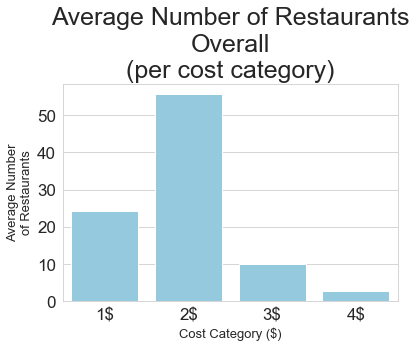

In [95]:
# Finding average amount of all restaurants in each $-group
yelp_mean = yelp_df.drop(['zip_code','median_income'], axis=1).mean()

sns.set_style("whitegrid")

# Plotting average amount of all restaurants in each $-group
sns.barplot(yelp_mean.index, 
            yelp_mean.values,
           color="skyblue");

# Setting the title to size 35
plt.title ('Average Number of Restaurants\nOverall\n(per cost category)', 
           size=25);
plt.ylabel('Average Number\nof Restaurants', size = 13);
plt.xlabel('Cost Category ($)', size = 13);
# setting size of yticks and xticks to 20
plt.yticks(size = 17);
plt.xticks(size = 17);


**Insights:**

Yelp's 2$ cost estimate has the highest average and this will be interesting to be explored further

We will explore further by breaking down the high and low median household incomes and plotting the results. Lets define our cut off points in the dataset to categorize two groups: high incomes and low incomes.

In [96]:
# Find the cut off point beween high and low income, as median of the whole income group
cut_off_point = yelp_df['median_income'].median()
cut_off_point

107178.0

In [97]:
# Slicing yelp data set into 2 sets: high and low income
# zip_code 10020 has no income, that is why there is only 20 high income and 20 low income observations
# High Income
yelp_df_high = yelp_df[yelp_df['median_income'] >= cut_off_point].sort_values('zip_code')
yelp_df_high.shape

(20, 6)

In [98]:
# Low Income
yelp_df_low = yelp_df[yelp_df['median_income'] < cut_off_point].sort_values('zip_code')
yelp_df_low.shape

(20, 6)

Now, we can plot our only high median household incomes given average the amount of restaurants with Yelp cost estimates.

#### Visualizing High Incomes 

In [99]:
# High Income preview
yelp_df_high.head()

,zip_code,1$,2$,3$,4$,median_income
2,10003,32,135,27,7,112131.0
3,10004,19,39,5,2,157645.0
4,10005,15,21,2,1,173333.0
5,10006,7,20,2,0,176250.0
6,10007,23,42,4,3,246813.0


In [100]:
# Getting mean of each restaurant cost estimates overall
yelp_df.drop(['zip_code','median_income'], axis=1).mean()

1$    24.268293
2$    55.634146
3$    10.024390
4$     2.853659
dtype: float64

In [101]:
# Getting mean of each restaurant cost estimates for all neighborhoods with high income
yelp_df_high.drop(['zip_code','median_income'], axis=1).mean()

1$    13.55
2$    56.95
3$    13.80
4$     3.50
dtype: float64

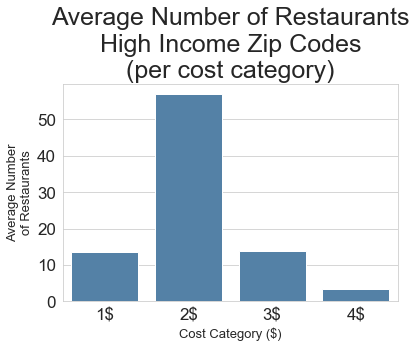

In [102]:
# Finding average amount of all restaurants in each $-group for zipcodes 
# with income over cut off point($107K)
yelp_mean = yelp_df_high.drop(['zip_code','median_income'], axis=1).mean()

sns.set_style("whitegrid")

# Plotting average amount of all restaurants in each $-group
sns.barplot(yelp_mean.index, 
            yelp_mean.values,
           color="steelblue");

# Setting the title to size 35
plt.title ('Average Number of Restaurants\nHigh Income Zip Codes\n(per cost category)', 
           size=25);
plt.ylabel('Average Number\nof Restaurants', size = 13);
plt.xlabel('Cost Category ($)', size = 13);
# setting size of yticks and xticks to 20
plt.yticks(size = 17);
plt.xticks(size = 17);

**Insights:**

Yelp's 2$ cost estimate has the highest average when the median household income is high 

Next, lets plot our low median household incomes given average the amount of restaurants with Yelp cost estimates.

#### Visualizing Low Incomes 

In [103]:
# Getting mean of each restaurant cost estimates for all neighborhoods with low income
yelp_df_low.drop(['zip_code','median_income'], axis=1).mean()

1$    35.60
2$    56.50
3$     6.45
4$     2.30
dtype: float64

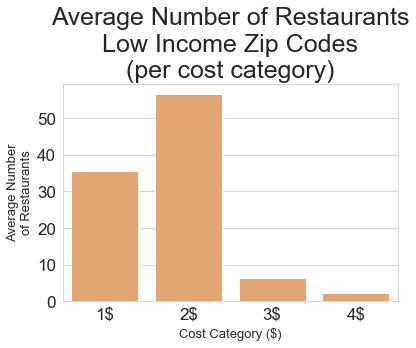

In [104]:
# Finding average amount of all restaurants in each $-group for zipcodes 
# with income under cut off point($107K)
yelp_mean = yelp_df_low.drop(['zip_code','median_income'], axis=1).mean()

sns.set_style("whitegrid")

# Plotting average amount of all restarants in each $-group
sns.barplot(yelp_mean.index, 
            yelp_mean.values,
           color="sandybrown");

# Setting the title to size 35
plt.title ('Average Number of Restaurants\nLow Income Zip Codes\n(per cost category)', 
           size=25);
plt.ylabel('Average Number\nof Restaurants', size = 13);
plt.xlabel('Cost Category ($)', size = 13);
# setting size of yticks and xticks to 20
plt.yticks(size = 17);
plt.xticks(size = 17);

**Insights:**

Again, Yelp's 2$ cost estimate has the highest average even when the median household income is low

Next, we want to explore highest and lowest median household income by zipcode to further our analysis.  

### Exploring by Zip Code

We will create a function to plot each cost estimate.

In [105]:
# Finding zip codes with highest median income
yelp_df.sort_values('median_income', ascending = False).head()

,zip_code,1$,2$,3$,4$,median_income
6,10007,23,42,4,3,246813.0
5,10006,7,20,2,0,176250.0
4,10005,15,21,2,1,173333.0
40,10280,2,5,0,0,169844.0
3,10004,19,39,5,2,157645.0


In [106]:
# Finding zip codes with lowest median income
yelp_df.sort_values('median_income', ascending = True).head()

,zip_code,1$,2$,3$,4$,median_income
32,10035,23,18,0,0,30081.0
26,10029,77,66,2,1,34016.0
1,10002,45,103,14,1,35859.0
27,10030,23,18,1,0,37232.0
36,10039,17,8,0,0,39653.0


In [107]:
# function plots barchart with business count per zip code
# requiered parameters: dataset and business yelp group
def plot_business_count_per_zip(df, variable):
    plt.figure(figsize=(4,10));

    labels = np.array(df['zip_code']);
    values = np.array(df[variable]); 
    clrs = ['steelblue' if (x == 10004 or x==10005 or x==10007)
            else 'sandybrown' if (x == 10002 or x == 10029 or x == 10035) 
            else 'lightgray' for x in labels];

    sns.barplot(y=labels, # restaraunt count per zip code
                x=values, # zip codes
                palette=clrs, # using colors based on condition
               orient = 'h'); # horizontal

    # setting title to size 25
    plt.title (f'Number of {variable} Restaurants\nby Zip Code', size=25);
    plt.ylabel('Zip Code', size = 15);
    plt.xlabel('Restaurant Count', size = 15);
    # setting size of yticks and xticks to 13
    plt.yticks(size = 13);
    plt.xticks(size = 13);

    # creating a cumstom legend: "How to add legend on Seaborn facetgrid bar plot"
    name_to_color = {
        'Highest Income':   'steelblue',
        'Lowest Income':   'sandybrown',
    }

    patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
    plt.legend(handles=patches, loc='lower right');

#### 1 Dollar Cost Estimate

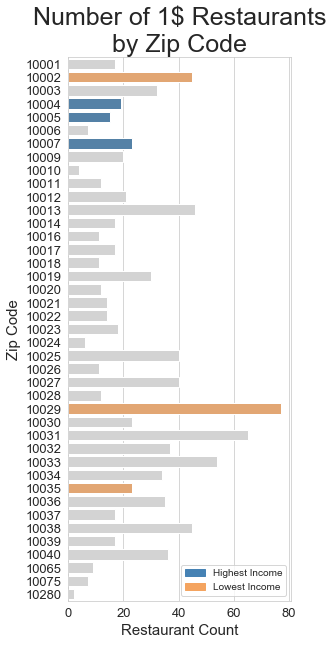

In [108]:
plot_business_count_per_zip(yelp_df, '1$')

#### 2 Dollar Cost Estimate

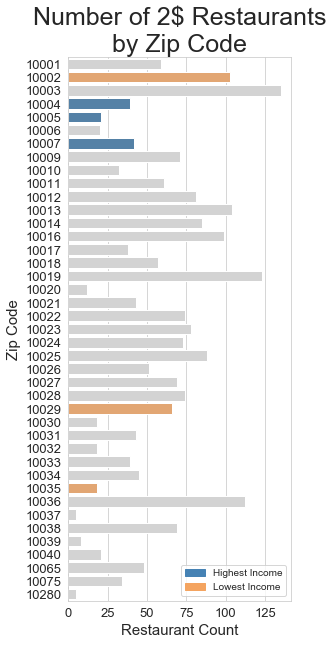

In [109]:
plot_business_count_per_zip(yelp_df, '2$')

#### 3 Dollar Cost Estimate

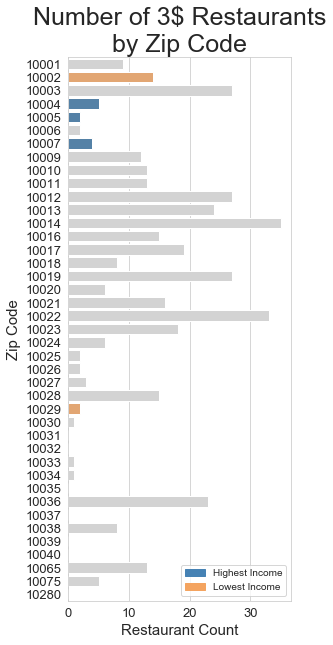

In [110]:
plot_business_count_per_zip(yelp_df, '3$')

#### 4 Dollar Cost Estimate

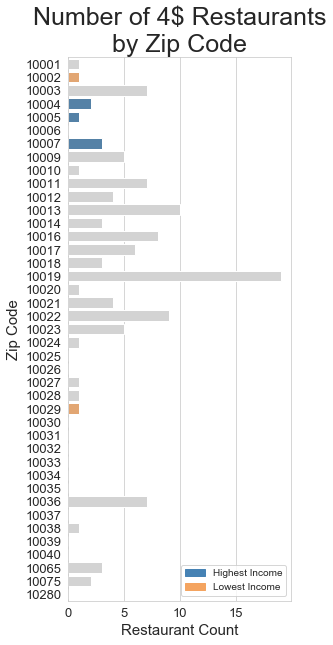

In [111]:
plot_business_count_per_zip(yelp_df, '4$')

**Insights:**

- The trend between restaurant costs follow a decreasing pattern 
- 1 dollar cost estimate being the most popular
- 4 dollar cost estimate being the least popular 
- Lower income areas show a higher count in this trend while higher income areas show a less drastic trend
- Some zip codes don’t follow the trend at all

To explore further, we notice that some zip codes do not follow the trends. Lets look at these zip codes: 10012, 10014, 10019, 10022. 

### Exploring 10012, 10014, 10019, 10022 Zip Codes

Again, we will create a function to plot each cost estimate for these specific zip codes. However, we will only be looking at the 3$ cost estimate to further show the disparities.

In [112]:
# function plots barchart with business with highest count in 
# 3$ yelp group per zip code 
# requiered parameters: dataset and business yelp group
def plot_business_most_count_per_zip(df, variable):
    plt.figure(figsize=(4,10));

    labels = np.array(df['zip_code']);
    values = np.array(df[variable]); 
    clrs = ['mediumseagreen' if (x == 10012 or x==10014 or x==10019 or x==10022) 
            else 'lightgray' for x in labels];

    sns.barplot(y=labels, 
                x=values, 
                palette=clrs,
               orient = 'h');

    plt.title (f'Number of {variable} Restaurants\nby Zip Code', size=25);
    plt.ylabel('Zip Code', size = 15);
    plt.xlabel('Restaurant Count', size = 15);
    # setting size of yticks and xticks to 20
    plt.yticks(size = 13);
    plt.xticks(size = 13);

    # creating a cumstom legend
    # credit to the source: "How to add legend on Seaborn facetgrid bar plot"
    name_to_color = {
        'Highest 3$ Count':   'mediumseagreen',
        'Lowest 3$ Count':   'lightgray',
    }

    patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
    plt.legend(handles=patches, loc='lower right');

#### 1 Dollar Cost Estimate Highlights

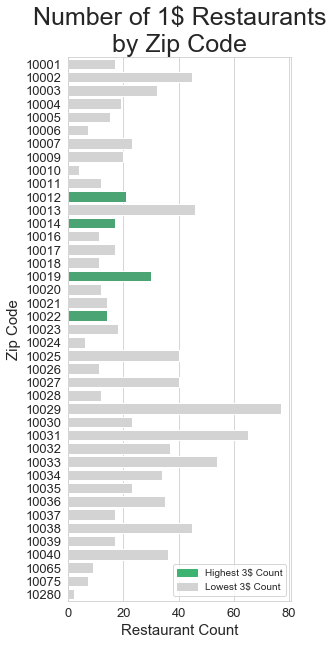

In [113]:
plot_business_most_count_per_zip(yelp_df, '1$')

#### 2 Dollar Cost Estimate Highlights

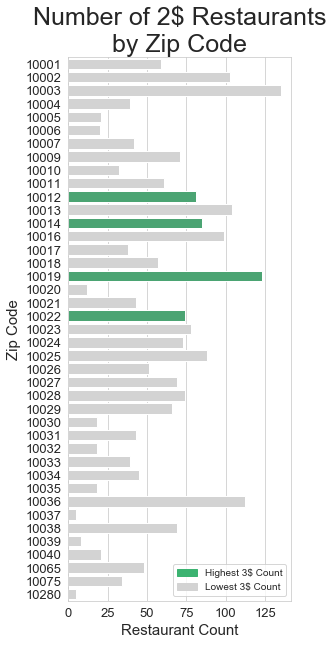

In [114]:
plot_business_most_count_per_zip(yelp_df, '2$')

#### 3 Dollar Cost Estimate Highlights

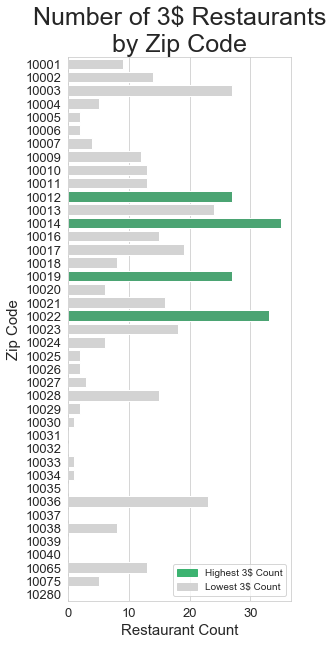

In [115]:
plot_business_most_count_per_zip(yelp_df, '3$')

#### 4 Dollar Cost Estimate Highlights

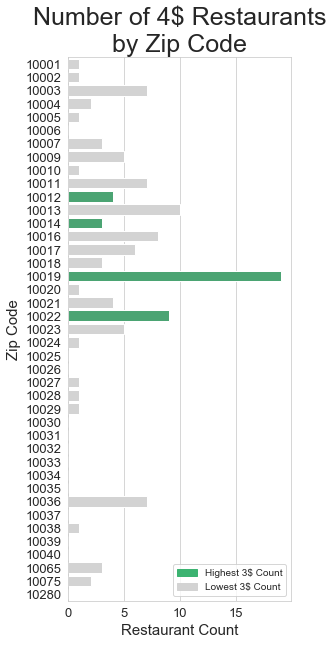

In [116]:
plot_business_most_count_per_zip(yelp_df, '4$')

**Insights:**

Again, these zip codes do not follow trends. For example, the zip code 10012 is near Washington Square Park. Thus, this can influence the Yelp cost estimates because College Students and Homeowners live aorund there.

To go even further, we can compare these zip codes to the income_breakdown dataset. Remember our income_breakdown dataset breaks down the household incomes in buckets for each zipcode. We can also see possible income outliers. 

#### Supplement Visualizes

Zip Code 10012:

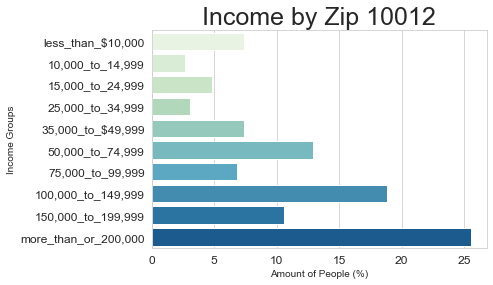

In [117]:
plot_income_by_zip(df, 10012)

Zip Code 10014:

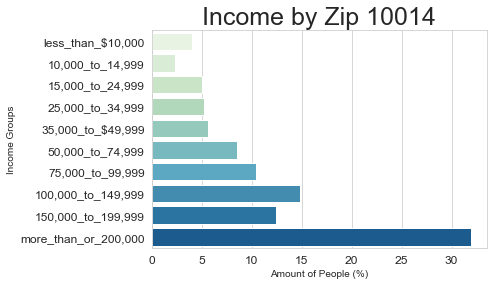

In [118]:
plot_income_by_zip(df, 10014)

Zip Code 10019:

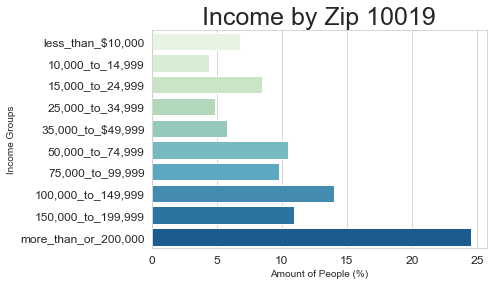

In [119]:
plot_income_by_zip(df, 10019)

Zip Code 10022:

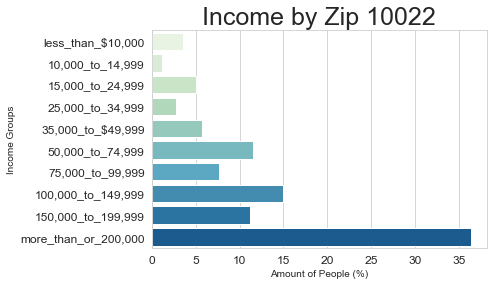

In [120]:
plot_income_by_zip(df, 10022)

**Insights:**

Even through these zipcodes have very high household incomes, there are still disparities in the Yelp 3$ cost estimates. 

In sum, we were able to see the trends and relationships in our dataset. However, another way to explore our data is to Geomap because it is easier to explore trends and relationships.  

### Setting Up For GeoMaps

It can be an easier way to see the trends and relationships.

In [121]:
# reading the file of all coordinates for City of New York, for future map plots
# source: zip code new york city boundaries
nyc = gpd.read_file('../data/zip/ZIP_CODE_040114.shp')
nyc.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."


In [122]:
# checking the columns of the dataframe
nyc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null object
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 26.8+ KB


In [123]:
# Reading yelp.csv file
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(3)

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income
0,10001,17,59,9,1,88526.0
1,10002,45,103,14,1,35859.0
2,10003,32,135,27,7,112131.0


In [124]:
# Setting new column names for future plotting
new_columns_dict = {
    'price_$':      '1$',
    'price_$$':     '2$',
    'price_$$$':    '3$',
    'price_$$$$':   '4$'}

# Replacing old column names with new
yelp.rename(columns = new_columns_dict, inplace=True)

In [125]:
# sorting zip codes of New York city by median income
yelp.sort_values('median_income', ascending=False).head()

,zipcode,1$,2$,3$,4$,median_income
6,10007,23,42,4,3,246813.0
5,10006,7,20,2,0,176250.0
4,10005,15,21,2,1,173333.0
40,10280,2,5,0,0,169844.0
3,10004,19,39,5,2,157645.0


In [126]:
# checking the number of zip codes that we woring with
yelp.shape

(41, 6)

In [127]:
# Converting zip_code from census_income.csv file to
# get a list of only those zip codes that we are working with
yelp['zipcode'] = yelp['zipcode'].astype(str)
manhattan_zip_code_list = yelp['zipcode'].tolist()

# getting only manhattan for plotting
manhattan = nyc.loc[nyc['ZIPCODE'].isin(manhattan_zip_code_list)]

# checking the size of the mahnattan df
manhattan.shape

(45, 13)

In [128]:
# since zip code 10004 and appears more than once, 
# we deleting those rows [109 , 113, 114]
manhattan = manhattan.drop([109, 113, 114])

We will first map zip codes on a Manhattan map.

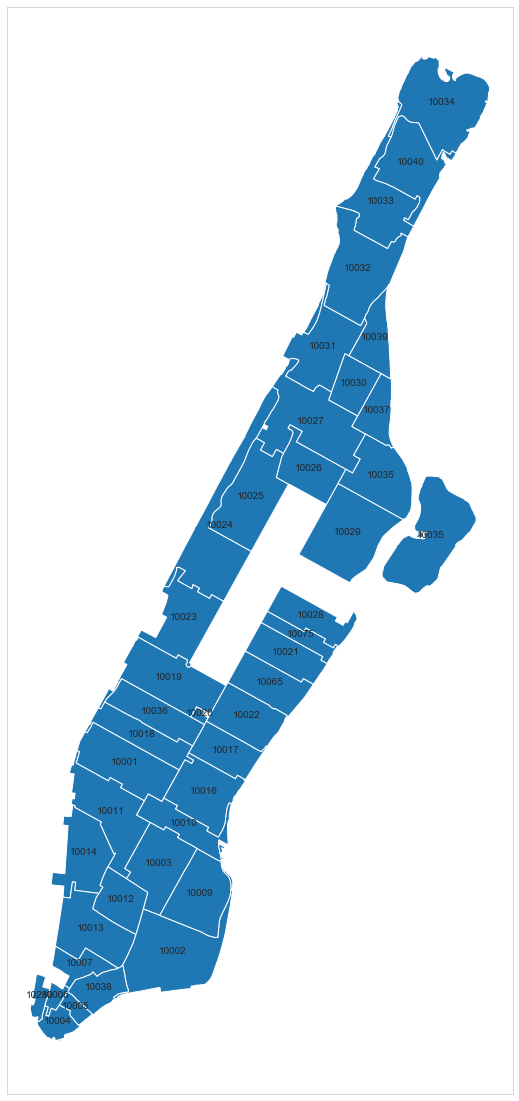

In [129]:
# source: geomap plotting

# Setting a template for geomap of Manhattan only (by zip codes)
ax = manhattan.plot(figsize=(30,20));
manhattan.apply(lambda x: ax.annotate(s=x.ZIPCODE, 
                               xy=x.geometry.centroid.coords[0], 
                               ha='center'), axis=1);
#removing ticks
plt.yticks([],[]);
plt.xticks([],[]);

In [130]:
# Merge two dataframes: yelp and income with manhattan map (by zip code)
merged_df = pd.merge(manhattan, yelp, left_on='ZIPCODE', right_on='zipcode')
# checking the merge
merged_df.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,zipcode,1$,2$,3$,4$,median_income
0,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",10034,34,45,1,0,54716.0
1,10033,0,New York,54284.0,1.615605e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1003020.865 256049.162, 1003096.046 ...",10033,54,39,1,0,58614.0


Next, we can create a function that will plot particular features from our dataset.

In [131]:
# credit ot this source: geomap plotting
# function map_plot will plot a geomap of Manhattan and color each zip code
# based of a value of specific variable. 
# Original datbase with coordinates, variable name, Graph title, legend tile 
# are required paramenters. Color can be changed if needed.
def map_plot(df, variable, graph_title, legend_title, color = 'Greens'):
    
    # set the range for the choropleth
    vmin, vmax = 120, 220
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, 1,  figsize=(20, 12))
    ## divider and cax separate legend from main plot
    divider = make_axes_locatable(ax)
    ## cax controls legend only
    cax = divider.append_axes('right', size = '5%', pad = 0.1)
    df.plot(column=variable, cmap=color,
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend = True,
            cax = cax) ## add legend to plot
    
    ## plt controls the legend
    plt.tick_params(labelsize = 15)
    plt.title(legend_title, loc = 'left', size = 15)
    
    ## ax controls the plot
    ax.set_yticks([],[]);
    ax.set_xticks([],[]);
    ax.set_title(graph_title, size=30);
    
    # Creating annoations (zip codes number) to apply in our map
    df.apply(lambda x: ax.annotate(s=x.ZIPCODE, 
                                   xy=x.geometry.centroid.coords[0], 
                                   ha='center'), axis=1);
    plt.tight_layout()

Lets start with mapping the income.

#### Mapping by Income

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


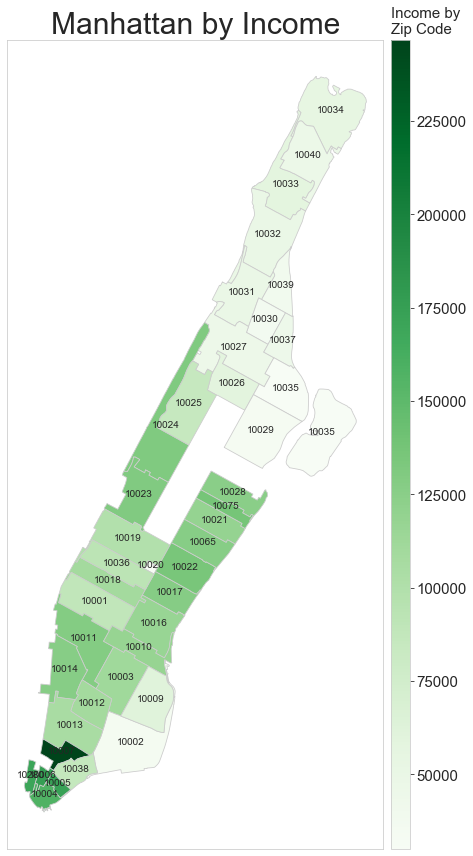

In [132]:
# plotting NYC map by Median Income
map_plot(merged_df, 'median_income', 'Manhattan by Income', "Income by\nZip Code")

We can compare this geomap to the Yelp cost estimates.

#### Mapping by 1 Dollar Cost Estimate

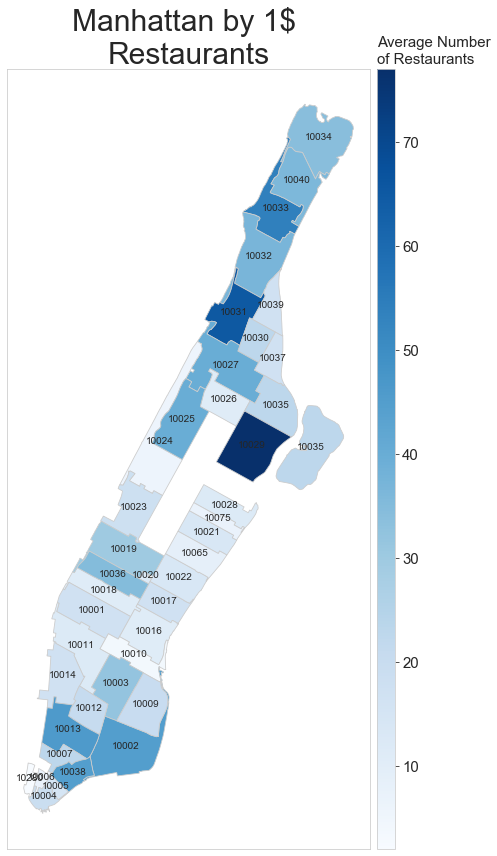

In [133]:
# plotting NYC map by 1$ group
map_plot(merged_df, '1$', 'Manhattan by 1$ \nRestaurants', "Average Number\nof Restaurants", 'Blues')

**Insights:**  

Lower income areas have a larger number of restaurants with a 1 dollar costs.

### Mapping by 2 Dollar Cost Estimate

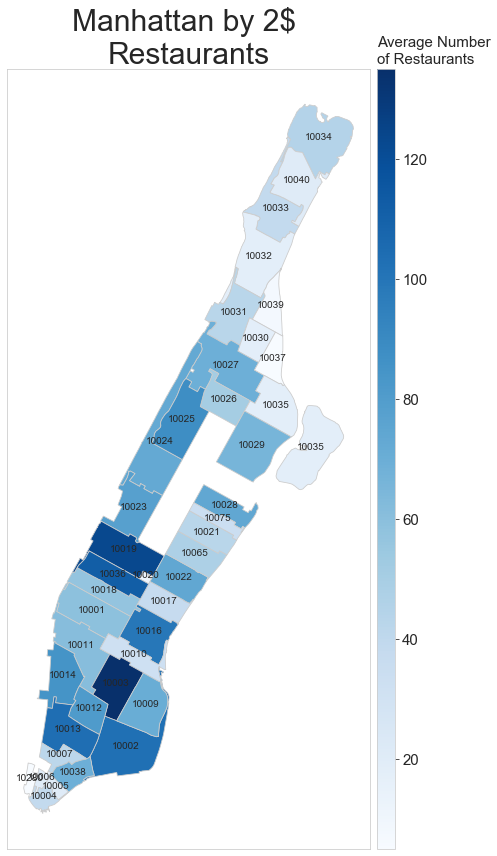

In [134]:
# plotting NYC map by 2$ group
map_plot(merged_df, '2$', 'Manhattan by 2$ \nRestaurants', "Average Number\nof Restaurants", 'Blues')

**Insights:**

Higher cost restaurants begins to be more apparent in higher income areas.

### Mapping by 3 Dollar Cost Estimate

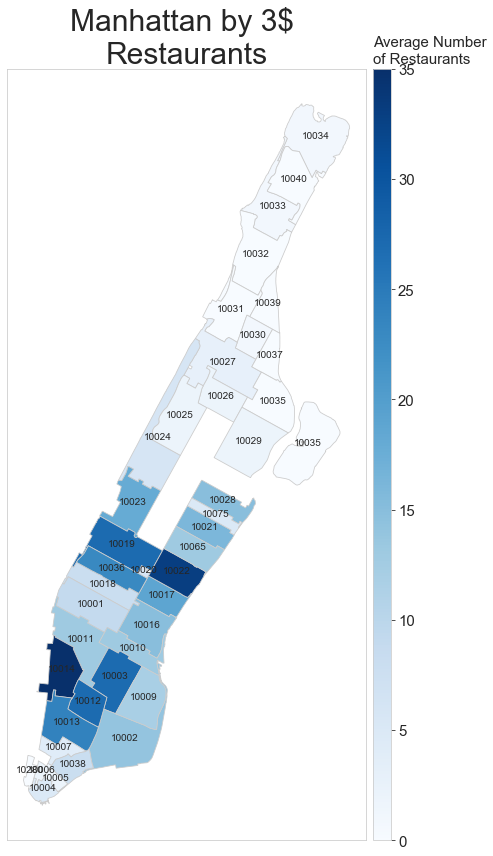

In [135]:
# plotting NYC map by 3$ group
map_plot(merged_df, '3$', 'Manhattan by 3$ \nRestaurants', "Average Number\nof Restaurants", 'Blues')

**Insights:**  

The spread of 3$ restaurants are concentrated in higher income areas.

### Mapping by 4 Dollar Cost Estimate

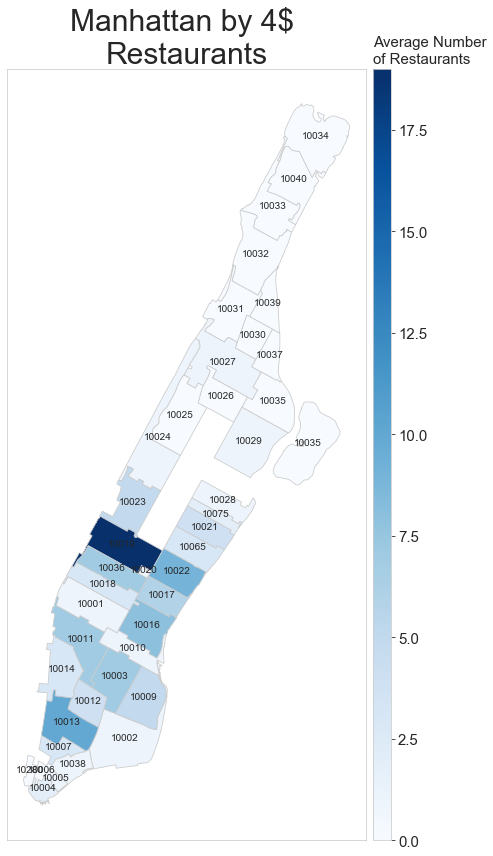

In [136]:
# plotting NYC map by 4$ group
map_plot(merged_df, '4$', 'Manhattan by 4$ \nRestaurants', "Average Number\nof Restaurants", 'Blues')

**Insights:**  

Lower income areas have practically no 4$ restaurants.

In sum, we explored our dataset by two different avenues. We use bar graphs and geomapping. We were able to determined the trends and relationships in our dataset. Next, we can preprocess for our modeling. 

# Preprocessing

We will begin by feature enginnering. We will create this feature in our dataset because it was a results from our EDA and [Manhattan Yelp $ vs Affluence](https://public.tableau.com/profile/alex.lau1352#!/vizhome/updatedManhattanyelpvsaffluence/Dashboard?publish=yes). Then, we will create our target variable: affluence. Then, we will create our X features and y for our train-test-split. Lastly, lets determine our baseline score.

Lets read in both yelp and restuarants datasets.

In [137]:
# Read in datasets
yelp = pd.read_csv('../data/yelp.csv')
rest = pd.read_csv('../data/restaurants.csv')

### Feature Engineering
We will feature engineer a new column that averages the Yelp cost estimates for each zip code. In other words, we want to determine if there is a relationship between the average and the median income. Then we merge with both datasets to have one master dataframe that has all our values at hand.

In [138]:
# Check out the data
yelp.head()

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income
0,10001,17,59,9,1,88526.0
1,10002,45,103,14,1,35859.0
2,10003,32,135,27,7,112131.0
3,10004,19,39,5,2,157645.0
4,10005,15,21,2,1,173333.0


In [139]:
# Feature engineering for average yelp cost estimate 
yelp['avg_price'] = (yelp['price_$'] + (2 * yelp['price_$$']) + (3 * yelp['price_$$$']) + (4 * yelp['price_$$$$'])) / (yelp['price_$'] + yelp['price_$$'] + yelp['price_$$$'] + yelp['price_$$$$'])

In [140]:
# Preview to check for new column
yelp.head()

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income,avg_price
0,10001,17,59,9,1,88526.0,1.930233
1,10002,45,103,14,1,35859.0,1.822086
2,10003,32,135,27,7,112131.0,2.044776
3,10004,19,39,5,2,157645.0,1.846154
4,10005,15,21,2,1,173333.0,1.717949


In [141]:
# Drop restaurant title and type
columns = rest.drop(columns = ['name', 'type'])

# Create list of column names 
wanted_columns = []
for i in columns:
    wanted_columns.append(i)

# Take the raw count of each alias and groupy by zip code
rest_sums = rest[wanted_columns].groupby('zipcode').sum().reset_index()

# Merge yelp and restaurant datasets 
df = pd.merge(yelp, rest_sums, how = 'inner', on= 'zipcode')

# Drop duplicated price columns
df = df.drop(columns = ['price_$_y', 'price_$$_y', 'price_$$$_y', 'price_$$$$_y'])

# Drop zip code 10020 due to no income value 
df = df.drop(index = 17)

# Reset index to be chronological
df = df.reset_index()

In [142]:
# Preview master dataframe
df.head()

,index,zipcode,price_$_x,price_$$_x,price_$$$_x,price_$$$$_x,median_income,avg_price,review_count,rating,...,uzbek,vegan,vegetarian,venezuelan,venues,vietnamese,waffles,whiskeybars,wine_bars,wraps
0,0,10001,17,59,9,1,88526.0,1.930233,75662,345.5,...,0,3,3,0,0,0,0,0,2,0
1,1,10002,45,103,14,1,35859.0,1.822086,108575,671.0,...,0,6,1,1,0,4,1,1,11,1
2,2,10003,32,135,27,7,112131.0,2.044776,204973,809.0,...,0,8,4,0,1,5,1,1,9,0
3,3,10004,19,39,5,2,157645.0,1.846154,19535,244.0,...,0,0,0,0,3,1,0,1,1,0
4,4,10005,15,21,2,1,173333.0,1.717949,6914,146.0,...,0,0,2,0,0,0,0,0,1,0


Next, lets classify our affluence rate.

### Classifying Affluence
Since we are instantiating and training our model to classify affluence, we created a new column that is based on sorting median income into their respective affluence bracket.

In [143]:
# Assign affluence number based on median income 
# Source: Household Income in Manhattan, New York County, New York (Borough)
buckets = []
for income in df['median_income']: 
    if income <= 21_300: 
        buckets.append(1)
    elif 21_300 < income <= 54_400: 
        buckets.append(2)
    elif 54_400 < income <= 75_500: 
        buckets.append(3)
    elif 75_500 < income <= 101_000:
        buckets.append(4)
    elif 101_000 < income <= 190_000: 
        buckets.append(5)
    elif 190_000 < income <= 250_000: 
        buckets.append(6)
    else: 
        buckets.append(0)

df['income_buckets'] = buckets

Next, lets instantiate our X features and y and do our train test split. 

### Train Test Split

In [144]:
#from trial and error selected these features as our X
features = ['price_$_x', 'price_$$_x', 'price_$$$_x', 'price_$$$$_x', 'avg_price']

X = df[features]
y = df['income_buckets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Lastly, lets determine our baseline score.

### Baseline Score

The baseline score is actually an accuracy score. It is the percentage of the majority class. It will serve as the benchmark for our classification models to beat.

In [145]:
# Baseline 
y.value_counts(normalize = True)

5    0.500
2    0.250
4    0.125
3    0.100
6    0.025
Name: income_buckets, dtype: float64

The majority class end up being bucket 5 which is household income between 101_000 & 190_000 because this has the most income included in y. Therefore, our baseline accuracy is about 0.500. 

We were able to prep for our modeling, now we can model.

# Modeling
Note: A `random_state` was inputed into all models to produce the same results if the notebook was rerun. 

We are going to be modeling different classification models to determine how accurate it is towards our problem statement with it's accuracy score. We will model: Decision Tree Classifier with default hyperparameters, GridSearch on Decision Tree Classifier, Random Forest Classifier, AdaBoost Classifier, Gradient Boost Classifier, and Voting Classifier. 

We will start with the Decision Tree Classifier with default hyperparameters.

### Decision Tree Classifier with Default Hyperparameters
We start with a rudimentary classifier that's similar to the game of 20 questions with default parameters. 

In [146]:
# Instantiate model
dt = DecisionTreeClassifier(random_state = 42)

# Fit model
dt.fit(X_train, y_train)

# Score model
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.6428571428571429


**Insights:**

The model does extraordinarily well with 100% accuracy on the training dataset. However, when looking at the testing dataset, the model is proven to be severely overfit as it is only 64.29% accurate in classifiying affluence on unexposed data.

Next, we will model the GridSearch on Decision Tree Classifier.

### GridSearch on Decision Tree Classifier
After viewing an overfit model, we introduce hyperparameters for our model to grid search over in order to be more finetuned to the training and testing datasets where it is not too biased.

In [147]:
# Instantiate model with hyperparameters
grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 423), 
                    param_grid = {
                        'max_depth' : [3, 5, 7, 10],
                        'min_samples_split' : [5, 10, 15, 20], 
                        'min_samples_leaf' : [2, 3, 4, 5, 6, 7]
                    }, 
                   cv = 5)

# Fit model
grid.fit(X_train, y_train)

# Determine best hyperparameters
print(f'Best parameters: {grid.best_params_}')
print('')

# Set best model to a new variable
dt = grid.best_estimator_

# Score model
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}

Score on training set: 0.6923076923076923
Score on testing set: 0.7142857142857143


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Insights:**

We ended up with an underfit model with a training score of 69.23% and a testing score of 71.43%.

Next, we will model the Random Forest Classifier.

### Random Forest Classifier
This is where we begin to explore a different classifier, but we dive right into adding hyperparameters to the model so the machine can determine what parameters work best.

In [148]:
# Instantiate model
rf = RandomForestClassifier(random_state = 42)

# Set parameters for grid search
rf_params = {
    'n_estimators': [100, 150, 200], 
    'max_depth': [None, 3, 4], 
    'bootstrap': [True, False]
}

# Instantiate 
gs = GridSearchCV(rf, param_grid = rf_params, cv = 5)

# Fit
gs.fit(X_train, y_train)

# Determine best parameters
print(f'Best parameters: {gs.best_params_}')
print('')

# Set best model to a new variable
model = gs.best_estimator_

# Score model
print(f'Score on training set: {model.score(X_train, y_train)}')
print(f'Score on testing set: {model.score(X_test, y_test)}')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'bootstrap': False, 'max_depth': 3, 'n_estimators': 100}

Score on training set: 0.8846153846153846
Score on testing set: 0.6428571428571429


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Insights:**

We begin seeing improvement with a training score of 88.46% and a testing score of 64.29% - still overfit though. While this model is doing better, there is still too much bias with this model. 

Next, we will model the AdaBoost Classifier.

### AdaBoost Classifier
After seeing improvements, we explore boosting models.

In [149]:
# Instantiate model
ada = AdaBoostClassifier(random_state = 42)

# Set parameters for grid search
ada_params = {
    'n_estimators': [50,100], 
    'learning_rate': [.9, 1.]
}

# Instantiate 
ada_gs = GridSearchCV(ada, param_grid = ada_params, cv = 5)

# Fit
ada_gs.fit(X_train, y_train)

# Determine best parameters
print(f'Best parameters: {ada_gs.best_params_}')
print('')

# Set best model to a new variable
ada_model = ada_gs.best_estimator_

# Score model
print(f'Score on training set: {ada_model.score(X_train, y_train)}')
print(f'Score on testing set: {ada_model.score(X_test, y_test)}')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'learning_rate': 1.0, 'n_estimators': 50}

Score on training set: 0.7692307692307693
Score on testing set: 0.42857142857142855


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Insights:**

We discovered that this model didn't contribute much. If anything, it actually made our model much worse resulting in a training score of 76.92% and a testing score of 42.86% - inaccurate on both datasets. 

Next, we will model the Gradient Boost Classifier.

### Gradient Boost Classifier
Given our lack of improvement with the previous boosting model, we explored another boosting model. 

In [150]:
# Instantiate model
gboost = GradientBoostingClassifier(random_state = 23)

# Set parameters for grid search
gboost_params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 125, 150]
}

# Instantiate 
gb_gs = GridSearchCV(gboost, param_grid = gboost_params, cv = 5)

# Fit
gb_gs.fit(X_train, y_train)

# Determine best parameters
print(f'Best parameters: {gb_gs.best_params_}')
print('')

# Set best model to a new variable
gb_model = gb_gs.best_estimator_

# Score model
print(f'Score on training set: {gb_model.score(X_train, y_train)}')
print(f'Score on testing set: {gb_model.score(X_test, y_test)}')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best parameters: {'max_depth': 4, 'n_estimators': 100}

Score on training set: 1.0
Score on testing set: 0.7142857142857143


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Insights:**

It shows better results with a training score of 100% and a testing score of 71.43%, but there isn't significant improvement from our Random Forest Classifier as the Gradient Boost causes our model to become more overfit. 

Lastly, we will model the Voting Classifier.

### Voting Classifier
We can combine multiple models at once.

In [151]:
# Instantiate model
vote = VotingClassifier([
    ('tree', DecisionTreeClassifier(random_state = 42)),
    ('random', RandomForestClassifier(random_state = 42)),
    ('ada', AdaBoostClassifier(random_state = 42)),
    ('gb', GradientBoostingClassifier(random_state = 42))
])

# Set parameters for grid search
vote_params = {
    'random__n_estimators': [100, 125, 150],
    'ada__n_estimators': [50, 75, 100],
    'gb__n_estimators': [100, 125, 150],
    'tree__max_depth': [None, 3, 5]
}

# Instantiate 
vote_gs = GridSearchCV(vote, param_grid = vote_params, cv = 3)

# Fit
vote_gs.fit(X_train, y_train)

# Set best model to a new variable
vote_model = vote_gs.best_estimator_

# Determine best parameters
print(f'Best parameters: {vote_gs.best_params_}')
print('')

# Score model
print(f'Score on training set: {vote_model.score(X_train, y_train)}')
print(f'Score on testing set: {vote_model.score(X_test, y_test)}')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'ada__n_estimators': 50, 'gb__n_estimators': 100, 'random__n_estimators': 100, 'tree__max_depth': None}

Score on training set: 1.0
Score on testing set: 0.7142857142857143


**Insights:**

Our final model, which we determined to be our best model, was a combination of all four models above in hand with a few hyperparameters so the machine could determine our best inputs. We ended up with a training score of 100% and a testing score of 71.43% - still overfit. While the model is still overfit, it results in the lowest variance (similar to Gradient Boost and Decision Tree Grid Search) accounting for about 30% misclassification. However, we decided with the Voting Classifier as it an ensemble of all four models so it may do better with future datasets.  

After determining our best model, we will decide to take a closer look and see which zip codes were misclassified.

### Comparing Predicted Versus Actual
Getting our misclassifications from comparing our predicted values with our actual values. 

In [152]:
# Make predictions with Voting Classifier
predictions = vote_model.predict(X)

In [153]:
# Convert array to list
preds = []
for x in predictions:
    preds.append(x)

In [154]:
# Convert series to list
actual = []
for x in y:
    actual.append(x)

In [155]:
# Create empty dataframe
affluence = pd.DataFrame()

# Add in columns and corresponding values
affluence['zipcode'] = df['zipcode']

affluence['predictions'] = preds

affluence['actual'] = actual

In [156]:
# Set zip codes to be index
affluence = affluence.set_index('zipcode')

**Insights:**

Only two zip codes were misclassified, which our EDA showed to have interesting factors to them. Zip codes 10007 and 10019 were the two neighborhoods that didn't have yelp cost estimates that followed the general trend of all other areas. Therefore, there may be other underlying factors that could contribute to determining affluence.

Lets save this affluence dataset for future use.

#### Exporting Affluence Classifications

In [157]:
affluence.to_csv('../data/affluence.csv', index = False)

## Mapping The Affluence
We will be using geomapping to map the affluence. 

In [158]:
# reading affluence dataset to apply on NYC map
aff_df = pd.read_csv('../data/income_groups.csv')
aff_df.head()

,zipcode,income_buckets
0,10001,4
1,10002,2
2,10003,5
3,10004,5
4,10005,5


In [159]:
# In order to merge the files by zipcode, the columns of zipcodes should be the same type:
# convert the merging column to string, same as in merged_df dataset
aff_df['zipcode'] = aff_df['zipcode'].astype(str)

# Merge two dataframes: yelp and income with manhattan map (by zip code)
merged_df = pd.merge(merged_df, aff_df, left_on='ZIPCODE', right_on='zipcode')

# checking the merge
merged_df.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,zipcode_x,1$,2$,3$,4$,median_income,zipcode_y,income_buckets
0,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,...,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",10034,34,45,1,0,54716.0,10034,3
1,10033,0,New York,54284.0,1.615605e+07,NY,New York,36,061,http://www.usps.com/,...,0.0,"POLYGON ((1003020.865 256049.162, 1003096.046 ...",10033,54,39,1,0,58614.0,10033,3


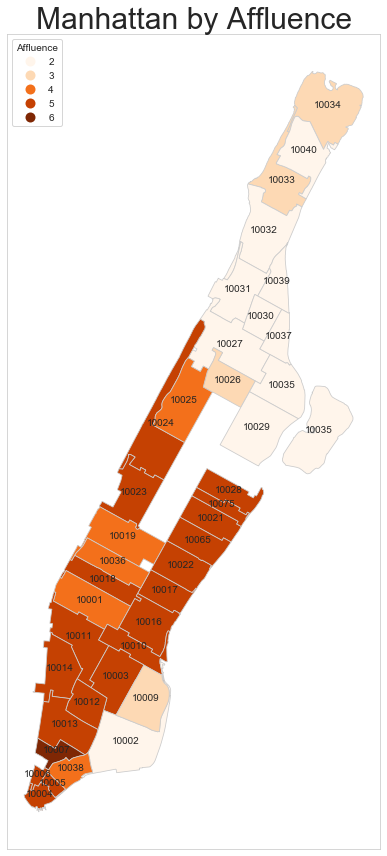

In [160]:
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, 1,  figsize=(20, 12))
# fig.set_facecolor((161/256, 220/256, 232/256, 0.4))
# ax.set_facecolor((161/256, 220/256, 232/256, 0.4))

merged_df.plot(column='income_buckets', 
               cmap=plt.cm.get_cmap("Oranges",6),
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend = True, legend_kwds = {'title':'Affluence', 'loc':'upper left'},
        categorical = True) ## add legend to plot

ax.set_yticks([],[]);
ax.set_xticks([],[]);
ax.set_title('Manhattan by Affluence', size=30);
# Creating annoations (zip codes number) to apply in our map
merged_df.apply(lambda x: ax.annotate(s=x.ZIPCODE, 
                               xy=x.geometry.centroid.coords[0], 
                               ha='center'), axis=1);
plt.tight_layout()

**Insights:**

The affluence is mostly in lower Manhattan while upper Manhattan has barely. 

We can now go into our overall conclusion.

## Conclusion

Yelp cost estimates can determine a neighborhood’s affluence. It isn’t perfect as there may be other underlying factors that can affect affluence more than the Yelp cost estimates of restaurants. Since our model quite accurately predicts affluence of neighborhoods based on public and easily accessible data, we can allocate resources based on affluency during emergencies; primarily focusing on less affluent neighborhoods.

## Limitations

There are several limitations of our model. We chose Manhattan data because we are familiar with the area, and because is a densely populated area with many businesses that exist on Yelp. This model may not work as well for a city that does not have as many businesses on Yelp, or contains zip codes that are either overwhelmingly residential or commercial. There were roughly 40 zip codes in our model, a relatively small sample size, but a tradeoff we made for potentially better data. Another limitation is that within a zip code you can have both low and high affluence. Our model is based on median incomes, which does not show whether an area has large wealth disparity, or if most people within a zip code earn a similar income. In an effort to identify areas of high or low affluence, having this granularity could better identify more accurate areas of affluence or lack thereof. Income itself is not necessarily an indicator of wealth, but it is an easily accessible source of data. If a business does not exist on Yelp, our model would not be able to extract the data, so we could be missing key insights.

## Further Explorations
If we had time we could investigate whether different cuisines play a role. In this section, we are able to do a little of that work. We will explore different types restaurant catergories and of businesses. The restaurant dataset that we created from Yelp aliases is not very helpful because there are nearly 250 categories within restaurants. We started manually condensing them by grouping them into roughly 50 cuisines, 73 overall including non-restaurants, in a separate CSV file. Lets begin by reading in the data from this file

### Read in Data for Cuisine

In [161]:
manual_categories = pd.read_csv('../data/webscraped_yelp_modified.csv')

In [162]:
manual_categories = manual_categories[['cuisine', 'zipcode']]

In [163]:
manual_categories.head()

,cuisine,zipcode
0,bakery,10023.0
1,halal,10019.0
2,ramen,10003.0
3,delis,10003.0
4,museum,10028.0


In [164]:
manual_categories.shape

(4807, 2)

Next, lets clean the data.

### Data Cleaning in Cuisine

We recognize from our EDA that some zip codes have very few businesses and some have a great deal, neither of which help us indicate the affluence of a zip code. Instead of using counts for each restaurant category, we are keeping this binary: whether a particular cuisine exists in the zip code at all.

In [165]:
# removing duplicates. Instead of count of businesses, we are assessing whether having a particular type of restaurant
# in a zip code can help us accurately categorize an affluence bucket. 
manual_categories.drop_duplicates(inplace = True)
manual_categories.shape

(1771, 2)

In [166]:
# creating a column for each cuisine type
manual_categories = pd.get_dummies(manual_categories, columns = ['cuisine'])
manual_categories.head()

,zipcode,cuisine_Bar,cuisine_Chinese,cuisine_Coffee shop,cuisine_Japanese,cuisine_South American,cuisine_Southeast Asian,cuisine_adventure,cuisine_african,cuisine_american,...,cuisine_spanish,cuisine_steak,cuisine_sushi,cuisine_tapas,cuisine_tea shop,cuisine_thai,cuisine_vegan_vegetarian,cuisine_venue,cuisine_vietnamese,cuisine_zoo
0,10023.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10019.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10003.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10003.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10028.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# consolidating the dataframe for each zip code
manual_categories = manual_categories.groupby(by = 'zipcode', as_index = False).sum()
# check the shape
manual_categories.shape

(113, 78)

In [168]:
# check what this looks like
manual_categories.head()

,zipcode,cuisine_Bar,cuisine_Chinese,cuisine_Coffee shop,cuisine_Japanese,cuisine_South American,cuisine_Southeast Asian,cuisine_adventure,cuisine_african,cuisine_american,...,cuisine_spanish,cuisine_steak,cuisine_sushi,cuisine_tapas,cuisine_tea shop,cuisine_thai,cuisine_vegan_vegetarian,cuisine_venue,cuisine_vietnamese,cuisine_zoo
0,7010.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7020.0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,7024.0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,7047.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7208.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# checking yelp dataframe
yelp.head()

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income,avg_price
0,10001,17,59,9,1,88526.0,1.930233
1,10002,45,103,14,1,35859.0,1.822086
2,10003,32,135,27,7,112131.0,2.044776
3,10004,19,39,5,2,157645.0,1.846154
4,10005,15,21,2,1,173333.0,1.717949


In [170]:
# checking data types on Yelp dataframe
yelp.dtypes

zipcode            int64
price_$            int64
price_$$           int64
price_$$$          int64
price_$$$$         int64
median_income    float64
avg_price        float64
dtype: object

In [171]:
# checking data types on Manual Categories dataframe. The Zip code needs to be changed. 
manual_categories.dtypes

zipcode                     float64
cuisine_Bar                   uint8
cuisine_Chinese               uint8
cuisine_Coffee shop           uint8
cuisine_Japanese              uint8
                             ...   
cuisine_thai                  uint8
cuisine_vegan_vegetarian      uint8
cuisine_venue                 uint8
cuisine_vietnamese            uint8
cuisine_zoo                   uint8
Length: 78, dtype: object

In [172]:
# converting zip code in manual categories to integer, to match the yelp dataframe
manual_categories['zipcode'] = manual_categories['zipcode'].astype('int')

# Checking the changes
manual_categories.dtypes

zipcode                     int64
cuisine_Bar                 uint8
cuisine_Chinese             uint8
cuisine_Coffee shop         uint8
cuisine_Japanese            uint8
                            ...  
cuisine_thai                uint8
cuisine_vegan_vegetarian    uint8
cuisine_venue               uint8
cuisine_vietnamese          uint8
cuisine_zoo                 uint8
Length: 78, dtype: object

In [173]:
# Merge price data frame with income dataframe
df_big = pd.merge(yelp, manual_categories, how = 'left', on= 'zipcode')

df_big.head()

,zipcode,price_$,price_$$,price_$$$,price_$$$$,median_income,avg_price,cuisine_Bar,cuisine_Chinese,cuisine_Coffee shop,...,cuisine_spanish,cuisine_steak,cuisine_sushi,cuisine_tapas,cuisine_tea shop,cuisine_thai,cuisine_vegan_vegetarian,cuisine_venue,cuisine_vietnamese,cuisine_zoo
0,10001,17,59,9,1,88526.0,1.930233,1,0,1,...,0,1,1,0,0,0,1,0,0,0
1,10002,45,103,14,1,35859.0,1.822086,1,0,1,...,0,1,1,1,1,1,1,1,1,0
2,10003,32,135,27,7,112131.0,2.044776,1,1,1,...,1,1,1,1,1,1,1,0,1,0
3,10004,19,39,5,2,157645.0,1.846154,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,10005,15,21,2,1,173333.0,1.717949,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [174]:
# Assign affluence number based on median income 
buckets = []
for income in df_big['median_income']: 
    if income <= 21_300: 
        buckets.append(1)
    elif 21_300 < income <= 54_400: 
        buckets.append(2)
    elif 54_400 < income <= 75_500: 
        buckets.append(3)
    elif 75_500 < income <= 101_000:
        buckets.append(4)
    elif 101_000 < income <= 190_000: 
        buckets.append(5)
    elif 190_000 < income <= 250_000: 
        buckets.append(6)
    else: 
        buckets.append(0)

df_big['income_buckets'] = buckets

In [175]:
# identifying the zip code without median income
df_big.isnull().sum().sort_values(ascending = False)

median_income               1
income_buckets              0
cuisine_club                0
cuisine_bookstore           0
cuisine_breakfast_brunch    0
                           ..
cuisine_laundromat          0
cuisine_magicians           0
cuisine_mediterranean       0
cuisine_mexican             0
zipcode                     0
Length: 85, dtype: int64

In [176]:
# removing this zip code
df_big.dropna(inplace = True)

We now have a dataframe that is clean and ready for preprocessing.

### Preprocessing for The Cuisine Data

We are splitting the training group to 2/3 of the data, and the remaining 1/3 as the testing data. The target variable is the same as our previous model, but the features are now including the restaurant categories we manually assigned.

In [177]:
# setting our X and Y variables
X = df_big.drop(columns = ['median_income', 'income_buckets'])
y = df['income_buckets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Our baseline score is the same as earlier, at 50%.

Finally, we can model our data.

### Modeling The Cuisine Data

We are using the same Voting classifier model we used earlier. 

In [178]:
# Instantiate model
vote = VotingClassifier([
    ('tree', DecisionTreeClassifier(random_state = 42)),
    ('random', RandomForestClassifier(random_state = 42)),
    ('ada', AdaBoostClassifier(random_state = 42)),
    ('gb', GradientBoostingClassifier(random_state = 42))
])

# Set parameters for grid search
vote_params = {
    'random__n_estimators': [100, 125, 150],
    'ada__n_estimators': [50, 75, 100],
    'gb__n_estimators': [100, 125, 150],
    'tree__max_depth': [None, 3, 5]
}

# Instantiate 
vote_gs = GridSearchCV(vote, param_grid = vote_params, cv = 5)

# Fit
vote_gs.fit(X_train, y_train)

# Set best model to a new variable
vote_model = vote_gs.best_estimator_

# Determine best parameters
print(f'Best parameters: {vote_gs.best_params_}')
print('')

# Score model
print(f'Score on training set: {vote_model.score(X_train, y_train)}')
print(f'Score on testing set: {vote_model.score(X_test, y_test)}')

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'ada__n_estimators': 50, 'gb__n_estimators': 100, 'random__n_estimators': 150, 'tree__max_depth': None}

Score on training set: 1.0
Score on testing set: 0.5714285714285714


**Insights:**

Unfortunately, this model performs poorly. Perhaps there are better ways to cut and categorize the cuisines of restaurants, or other Yelp data we can incorporate to improve the model, but we are unable to determine at this time. 

## Recommendations

With more time, we would investigate other features beyond Yelp price estimates for better indications of affluence. We could see if restaurants that offer delivery or takeout service fall into income trends. We could also review other types of businesses, or even landmarks and parks that do not cost money, but their existence within a zipcode may attract or detract people from either ends of the weatlh spectrum. If going beyond Yelp is an option, we would explore other datasets that may help indicate areas with higher or lower affluence. We would also investigate additional Y variables besides income, if there are available net worth or asset databases. For now we can say that generally speaking, zip codes with higher percentages of low priced Yelp restaurants and lower percentages of high priced restaurants usually have a higher proportion of less affluent households than other zip codes.

## Sources

- [Yelp Fusion API](https://www.yelp.com/fusion)
- [Yelp API documentation](https://www.yelp.com/developers/documentation/v3/business_search)
- [Store API Credentials For Open Source Projects](https://chrisalbon.com/python/basics/store_api_credentials_for_open_source_projects/) 
- [Yelp API documentation/Businesses](https://api.yelp.com/v3/businesses/search)
- [ZIP Code Definitions of New York City Neighborhoods](https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm)
- [FEMA](https://www.fema.gov/blog/2015-04-29/everyone-must-be-prepared-emergencies)
- [New Light Technologies](https://newlighttechnologies.com/)
- [United State Census](https://2020census.gov/?cid=20002:%2Bus%20%2Bcensus:sem.ga:p:dm:en:&utm_source=sem.ga&utm_medium=p&utm_campaign=dm:en&utm_content=20002&utm_term=%2Bus%20%2Bcensus)
- [Median income in the past 12 months (in 2018 inflation-adjusted dollars)](https://data.census.gov/cedsci/table?q=income&tid=ACSST1Y2018.S1903&t=Income%20%28Households,%20Families,%20Individuals%29&vintage=2018)
- [How to add legend on Seaborn facetgrid bar plot](https://stackoverflow.com/questions/32261619/how-to-add-legend-on-seaborn-facetgrid-bar-plot/55953685)
- [Zip Code Boundaries](https://data.cityofnewyork.us/widgets/i8iw-xf4u)
- [Mapping with Matplotlib, Pandas, Geopandas and Basemap in Python](https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac)
- [Manhattan Yelp dollar vs Affluence](https://public.tableau.com/profile/alex.lau1352#!/vizhome/updatedManhattanyelpvsaffluence/Dashboard?publish=yes) 
- [Household Income in Manhattan, New York County, New York (Borough)](https://statisticalatlas.com/county-subdivision/New-York/New-York-County/Manhattan/Household-Income)